In [1]:
from typing import Union
from itertools import product
from math import ceil
import numpy as np
from numba import njit, prange
from numba.typed import List
from src.utils import poly_eval, allsequences, non_escaping_sequences, get_coefficients, compare
from src.functions import solomyak_alg, core_entropy
from src.angles import Angle
import matplotlib.pyplot as plt

In [2]:
solomyak_alg(0.5847168010308 + 0.2733728277929043779576*1j,10)

[array([-1, -1,  1,  1,  1,  1,  1,  1, -1, -1])]

Transform a sequence in the alphabet `+,0,-` into `1,0,-1`.
Check that all elements in the result of `solomyak_algorithm` start with the initial given sequence.

In [2]:
def preperiodic_angles(per,max_pre_rng=2,*, b_num=None, b_den=None):
    """Compute all the rational angles that under the doubling map
    are preperiodic with given period (`per`) and preperiod up to
    `max_pre_rng`.
    
    If `b_num` and `b_den` are given, compute all the preperiodic angles
    in the interval `[b_num/b_den, (b_num+1)/b_den]`."""
    if b_num is None:
        return [
            [2*k+1,(2**per-1)*2**(n)] 
            for n in prange(1,max_pre_rng) for k in prange(0,ceil(((2**per-1)*2**(n-1)-1)/2))
        ]
    else:
        return [
            [2*k+1,(2**per-1)*2**(n)] 
            for n in prange(1,max_pre_rng) for k in prange(0,ceil(((2**per-1)*2**(n-1)-1)/2))
            if b_den*(2*k+1) > b_num*(2**per-1)*2**(n) and b_den*(2*k+1) < (b_num+1)*(2**per-1)*2**(n)
        ]

angle_list = preperiodic_angles(3,7,b_num=1,b_den=7)
angle_list

[[3, 14],
 [5, 28],
 [7, 28],
 [9, 56],
 [11, 56],
 [13, 56],
 [15, 56],
 [17, 112],
 [19, 112],
 [21, 112],
 [23, 112],
 [25, 112],
 [27, 112],
 [29, 112],
 [31, 112],
 [33, 224],
 [35, 224],
 [37, 224],
 [39, 224],
 [41, 224],
 [43, 224],
 [45, 224],
 [47, 224],
 [49, 224],
 [51, 224],
 [53, 224],
 [55, 224],
 [57, 224],
 [59, 224],
 [61, 224],
 [63, 224],
 [65, 448],
 [67, 448],
 [69, 448],
 [71, 448],
 [73, 448],
 [75, 448],
 [77, 448],
 [79, 448],
 [81, 448],
 [83, 448],
 [85, 448],
 [87, 448],
 [89, 448],
 [91, 448],
 [93, 448],
 [95, 448],
 [97, 448],
 [99, 448],
 [101, 448],
 [103, 448],
 [105, 448],
 [107, 448],
 [109, 448],
 [111, 448],
 [113, 448],
 [115, 448],
 [117, 448],
 [119, 448],
 [121, 448],
 [123, 448],
 [125, 448],
 [127, 448]]

In [3]:
angles_lam = []
working_per3 = []
for ang in angle_list:
    theta = Angle(ang[0],ang[1])
    theta.assoc_lambda()
    lam = complex(theta.lam) # need to cast from <class 'sympy.core.add.Add'>
    lam = lam if lam.imag>0 else lam.conjugate() # always want positive imaginary part

#     print(f"{theta}\nitin = {theta.itin}")
    seq = get_coefficients(theta.itin)
#     print(f"{seq = }")
#     print(f"lambda = {lam}")
    if not np.abs(lam)<1e-13 and lam.imag>0:
        res = solomyak_alg(lam,len(seq))
        angles_lam.append(lam)
#         print(f"{res = }\n")
        if res:
            typed_seq = List(seq[1:])
            typed_res = List(res)
            onBdd = compare(typed_seq,typed_res)
#             print(f"\t\t\t\t{onBdd}\n\n")
            if onBdd: working_per3.append(theta)
#         else:
#             print("\t\t\t\tempty\n\n")
#     else:
#         print("\n\t\t\t\ttry another\n\n")

In [14]:
[(a,a.ks) for a in working_per3]

[(Angle(3,14), '1100'),
 (Angle(5,28), '11010'),
 (Angle(13,56), '110001'),
 (Angle(19,112), '1101010'),
 (Angle(27,112), '1100001'),
 (Angle(41,224), '11010001'),
 (Angle(47,224), '11001010'),
 (Angle(75,448), '110101010'),
 (Angle(97,448), '110010001')]

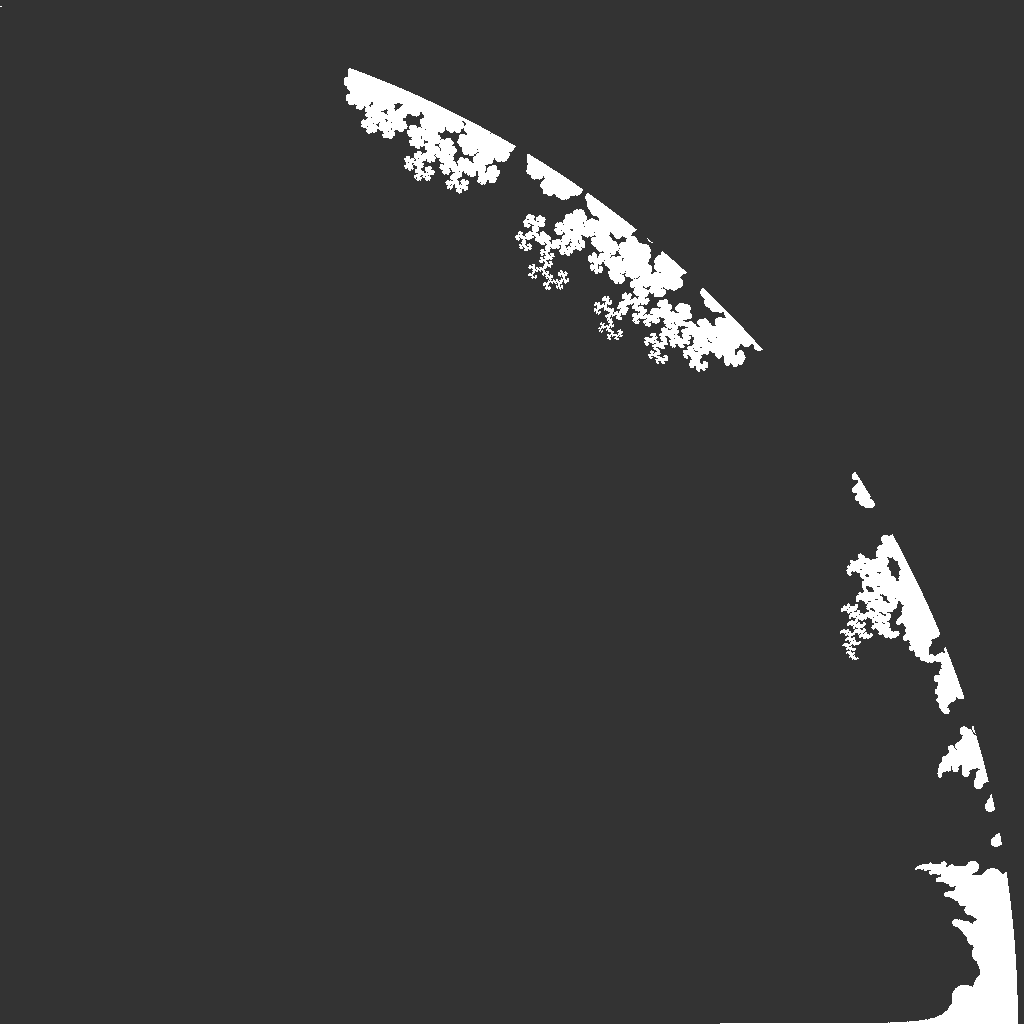

In [6]:
from src.parameter_spaces import checkPolyPM,checkPolyPZM
from PIL import Image
WIDTH = 1024
buf=70

xmin=0.0
xmax=0.711
ymin=0.0
ymax=0.711

max_deg = 16

image = Image.new("RGB", (WIDTH, WIDTH))

pixels = image.load()

for x in range(image.size[0]):   
    for y in range(image.size[1]): 
        px=((xmax-xmin)/(WIDTH-1))*x+xmin  # Convert pixel x-coordinate 
        py=((ymin-ymax)/(WIDTH-1))*y+ymax  # Convert pixel y-coordinate 
        w=complex(px,py)
        if (abs(w) > 2**(-0.5)) or (abs(w) < 0.5):
            pixels[x,y] =  (51,51,51) # (255,255,255) # (77,18,250) #
        else :
#             outputPZM = checkPolyPZM(w,1,0,max_deg)
            outputPM = checkPolyPM(w,1,0,max_deg)
#             if ( outputPZM == max_deg ):
#                 pixels[x, y] = (255,155,255) 
            if ( outputPM == max_deg ):
                pixels[x, y] = (255,255,255) #(102,0,153)
            else :
                pixels[x,y] = (51,51,51) #(77,int((255-buf)/max_deg*output)+buf,250) # (255,255,255) #
# display the output
image.show() #opens a new window

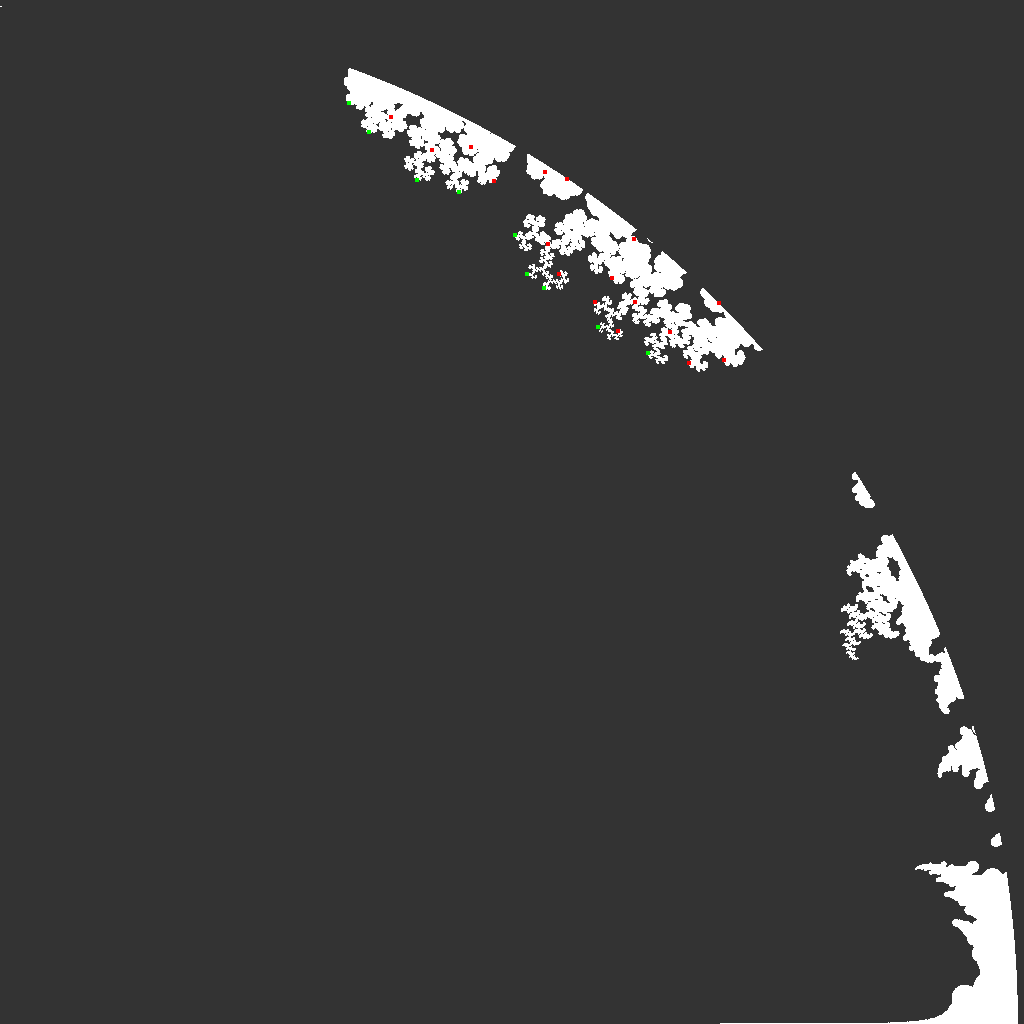

In [7]:
for l in angles_lam:
    px=l.real
    py=l.imag
    x=int((px-xmin)*(WIDTH-1)/(xmax-xmin))
    y=int((py-ymax)*(WIDTH-1)/(ymin-ymax))
    clr = (250,0,0)
    for m,n in product(range(-2,2), repeat=2):
        pixels[x+m,y+n] = clr
for a in working_per3:
    l=complex(a.lam)
    l = l if l.imag>0 else l.conjugate()
    px=l.real
    py=l.imag
    x=int((px-xmin)*(WIDTH-1)/(xmax-xmin))
    y=int((py-ymax)*(WIDTH-1)/(ymin-ymax))
    clr = (0,250,0)
    for m,n in product(range(-2,2), repeat=2):
        pixels[x+m,y+n] = clr
    
    
# display the output
image.show() #opens a new window

In [28]:
(len(angle_list),angle_list[-1]) # preperiodic_angles(3,7,b_num=1,b_den=7)

(63, [127, 448])

In [34]:
angle_list = preperiodic_angles(3,11,b_num=1,b_den=7)

In [35]:
(len(angle_list),angle_list[-1]) # preperiodic_angles(3,11,b_num=1,b_den=7)

(1023, [2047, 7168])

In [37]:
angle_list[:63]

[[3, 14],
 [5, 28],
 [7, 28],
 [9, 56],
 [11, 56],
 [13, 56],
 [15, 56],
 [17, 112],
 [19, 112],
 [21, 112],
 [23, 112],
 [25, 112],
 [27, 112],
 [29, 112],
 [31, 112],
 [33, 224],
 [35, 224],
 [37, 224],
 [39, 224],
 [41, 224],
 [43, 224],
 [45, 224],
 [47, 224],
 [49, 224],
 [51, 224],
 [53, 224],
 [55, 224],
 [57, 224],
 [59, 224],
 [61, 224],
 [63, 224],
 [65, 448],
 [67, 448],
 [69, 448],
 [71, 448],
 [73, 448],
 [75, 448],
 [77, 448],
 [79, 448],
 [81, 448],
 [83, 448],
 [85, 448],
 [87, 448],
 [89, 448],
 [91, 448],
 [93, 448],
 [95, 448],
 [97, 448],
 [99, 448],
 [101, 448],
 [103, 448],
 [105, 448],
 [107, 448],
 [109, 448],
 [111, 448],
 [113, 448],
 [115, 448],
 [117, 448],
 [119, 448],
 [121, 448],
 [123, 448],
 [125, 448],
 [127, 448]]

In [ ]:

working_per3 = []
for ang in angle_list[63:]:
    theta = Angle(ang[0],ang[1])
    theta.assoc_lambda()
    if type(theta.lam)==ConditionSet:
        continue
    lam = complex(theta.lam) # need to cast from <class 'sympy.core.add.Add'>
    lam = lam if lam.imag>0 else lam.conjugate() # always want positive imaginary part

    print(f"{theta}\nitin = {theta.itin}")
    seq = convert(theta.itin)
    print(f"{seq = }")
    print(f"lambda = {lam}")
    if not np.abs(lam)<1e-13 and lam.imag>0:
        res = solomyak_algorithm(lam,len(seq))
        print(f"{res = }\n")
        if res:
            onBdd = compare(seq[1:],res)
            print(f"\t\t\t\t{onBdd}\n\n")
            if onBdd: working_per3.append(theta)
        else:
            print("\t\t\t\tempty\n\n")
    else:
        print("\n\t\t\t\ttry another\n\n")

2023-06-28 13:54:39,311 - ERROR   : 129/896; Could not find any viable solution inside the disk of radius 2^(-0.5)
129/896
itin = +-++-++-+++---
seq = array([ 1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1])
lambda = -0j

				try another


2023-06-28 13:54:49,657 - ERROR   : 131/896; Could not find any viable solution inside the disk of radius 2^(-0.5)
131/896
itin = +-++-++--+++--
seq = array([ 1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1])
lambda = -0j

				try another


2023-06-28 13:54:50,187 - ERROR   : 133/896; Could not find any viable solution inside the disk of radius 2^(-0.5)
133/896
itin = +-++-++-
seq = array([ 1, -1,  1,  1, -1,  1,  1, -1])
lambda = -0j

				try another


2023-06-28 13:54:54,611 - ERROR   : 135/896; Could not find any viable solution inside the disk of radius 2^(-0.5)
135/896
itin = +-++-+++-+-+-+
seq = array([ 1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1])
lambda = -0j

				try another


2023-06-28 13:54:54,826 - ERROR   : 137/89

res = [array([ 0,  1,  1,  1, -1, -1,  1,  1,  1,  0,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1, -1,  1,  0,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  0,  0, -1,  0,  1,  1,  1,  1]), array([ 0,  1,  1,  1, -1, -1,  1,  1,  1,  0,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1, -1,  1,  0,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  0,  0, -1,  0,  0,  1,  1,  1]), array([ 0,  1,  1,  1, -1, -1,  1,  1,  0,  1, -1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1, -1,  0,  1, -1,  1,  1,  1]), array([ 0,  1,  1,  1, -1, -1,  1,  0,  1, -1, -1,  1,  1,  1]), array([-1,  1,  0, -1, -1, -1,  1,  1,  0, -1, -1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  0,  0,  1,  1,  0,  1,  1]), array([ 0,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  0,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  0,  1,  1]), array([-1,  1,  1, -1, -1,  1,  0,  0, -1, -1,  1,  0,  1,  1]), array([ 0,  1,  1,  1, -1, -1,  1,  1,  0,  1, -1,  0,  1,  1]), array([-1,  1,  1,

153/896
itin = +-++--++++---+
seq = array([ 1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1])
lambda = (0.2721445413225543+0.6154620380753975j)
res = [array([-1,  1,  1, -1, -1,  0,  1,  1, -1,  0,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1,  0, -1, -1, -1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1,  0, -1, -1, -1,  0,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1,  1, -1,  0,  1,  1,  0,  1]), array([-1,  1,  1, -1, -1,  0,  1,  1, -1, -1,  1,  0,  0,  1]), array([-1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  0,  1]), array([-1,  1,  1, -1, -1,  0,  1,  1, -1, -1,  1,  1, -1,  1]), array([-1,  1,  1, -1, -1,  0,  1,  1, -1, -1,  1,  0, -1,  1]), array([-1,  1,  1, -1, -1,  0,  1,  1, -1,  0,  1,  1,  1,  0]), array([-1,  1,  1, -1, -1,  0,  1,  1, -1,  0,  1,  0,  1,  0]), array([-1,  1,  1, -1, -1,  0,  1,  1, -1,  0,  0,  1,  0,  0]), array([-1,  1,  1, -1, -1,  0,  1,  1, -1, -1,  1,  0,  0,  0])

157/896
itin = +-++---+---+++
seq = array([ 1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1])
lambda = (0.2829546786682021+0.618967426718272j)
res = [array([-1,  1,  1, -1, -1,  0,  1,  0,  1,  0,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  0,  1, -1, -1,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1,  0,  0,  1, -1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1, -1,  1, -1, -1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  0,  1, -1, -1,  1,  0,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1,  0,  0,  0,  0,  0,  1,  1]), array([-1,  1,  1, -1, -1,  1,  0,  1,  1, -1, -1,  0,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1,  0,  0,  0,  0, -1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  0,  1,  1, -1, -1, -1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1,  0,  1, -1,  1,  1,  0,  1]), array([-1,  1,  1, -1, -1,  0,  0,  1, -1, -1,  1,  1,  0,  1]), array([-1,  1,  1, -1, -1,  0,  1,  0,  0,  0,  0,  0,  0,  1]), array([-1,  1,  1, -1, -1,  0,  1,  0,  0,  0, -1,  0,  0,  1]),

res = [array([-1,  1,  1, -1, -1, -1, -1,  1,  0,  0,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1, -1,  0,  0,  1,  1,  1,  0,  1,  1]), array([-1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  0,  0,  1,  1]), array([-1,  1,  1, -1, -1, -1, -1,  0,  0, -1, -1,  0,  1,  1]), array([-1,  1,  1, -1, -1, -1,  0,  0,  1,  1,  1, -1,  1,  1]), array([-1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  0, -1,  1,  1]), array([-1,  1,  1, -1, -1, -1, -1,  0,  0, -1,  0, -1,  1,  1]), array([-1,  1,  1, -1, -1, -1, -1,  0,  0, -1, -1, -1,  1,  1]), array([-1,  1,  1, -1, -1, -1, -1,  1,  0,  0,  1,  1,  0,  1]), array([-1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  0,  1]), array([-1,  1,  1, -1, -1, -1,  0,  0,  1,  1,  1,  0,  0,  1]), array([-1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  0,  0,  0,  1]), array([-1,  1,  1, -1, -1, -1, -1,  0,  0, -1, -1,  0,  0,  1]), array([-1,  1,  1, -1, -1, -1,  0,  0,  1,  1,  1, -1,  0,  1]), array([-1,  1,  1, -1, -1, -1, -1,  1, -1,  0,  1, -1,  0,  1]), array([-1,  1,  1,

171/896
itin = +-++--+-+++---
seq = array([ 1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1])
lambda = (0.319006737865944+0.620303943008887j)
res = [array([-1,  1,  1, -1, -1, -1,  0, -1, -1,  1,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0, -1,  0,  1, -1,  1,  1,  1,  1]), array([-1,  1,  1, -1,  0, -1,  0,  1,  0, -1,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1, -1,  0, -1, -1,  1,  0,  1,  1,  1]), array([-1,  1,  1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  1,  1]), array([-1,  1,  1, -1,  0, -1,  1,  0,  1,  0,  0,  1,  1,  1]), array([-1,  1,  1, -1,  0, -1,  0,  1,  0, -1,  0,  1,  1,  1]), array([-1,  1,  1,  0, -1,  0,  1,  0, -1, -1,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0, -1,  0,  0,  1, -1,  1,  1,  1]), array([-1,  1,  1, -1,  0, -1,  1,  0,  1,  0, -1,  1,  1,  1]), array([-1,  1,  1, -1,  0, -1,  0,  1, -1,  0, -1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0, -1, -1,  1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  0, -1,  0,  1,  0, -1, -1, -1,  1,  1,  1]), 

2023-06-28 13:58:34,054 - ERROR   : 173/896; Could not find any viable solution inside the disk of radius 2^(-0.5)
173/896
itin = +-++--+--+++--
seq = array([ 1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1])
lambda = -0j

				try another


2023-06-28 13:58:34,408 - ERROR   : 175/896; Could not find any viable solution inside the disk of radius 2^(-0.5)
175/896
itin = +-++-+-+
seq = array([ 1, -1,  1,  1, -1,  1, -1,  1])
lambda = -0j

				try another


2023-06-28 13:58:39,134 - ERROR   : 177/896; Could not find any viable solution inside the disk of radius 2^(-0.5)
177/896
itin = +-++-+--+-+-+-
seq = array([ 1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1])
lambda = -0j

				try another


2023-06-28 13:58:39,284 - ERROR   : 179/896; Could not find any viable solution inside the disk of radius 2^(-0.5)
179/896
itin = +-++-+--+-+-+-
seq = array([ 1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1])
lambda = -0j

				try another


181/896
itin = +-+++-++++---+
seq = array(

2023-06-28 13:59:05,852 - ERROR   : 183/896; Could not find any viable solution inside the disk of radius 2^(-0.5)
183/896
itin = +-+++-++-+-+-+
seq = array([ 1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1])
lambda = -0j

				try another


185/896
itin = +-+++--+---+++
seq = array([ 1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1])
lambda = (0.40295393901162785+0.5454773137139362j)
res = [array([-1,  1,  1,  0,  0, -1, -1, -1,  1,  0,  1,  1,  1,  1]), array([-1,  1,  1,  1, -1,  0,  0,  0,  0,  0,  1,  1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1,  1,  1, -1,  1,  1,  1,  1]), array([-1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  0,  1,  1,  1]), array([-1,  1,  1,  0,  0, -1, -1, -1,  0,  1,  0,  1,  1,  1]), array([-1,  1,  1,  1, -1,  0,  0, -1,  1, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1,  1,  0,  1, -1,  1,  1,  1]), array([-1,  1,  1,  1, -1,  0,  0, -1,  1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  0,  0, -1, -1, -1,  0,  1,  0,  0,  1,  1]), array([-1,

187/896
itin = +-+++--++---++
seq = array([ 1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1])
lambda = (0.3674213698405464+0.5622637028559431j)
res = [array([-1,  1,  1,  0, -1, -1, -1,  0, -1,  1,  0,  1,  1,  1]), array([-1,  1,  1,  0, -1, -1, -1, -1,  0,  0, -1,  1,  1,  1]), array([-1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  0, -1, -1, -1,  0, -1,  1,  1,  0,  1,  1]), array([-1,  1,  1,  0, -1, -1, -1, -1,  0,  0, -1,  0,  1,  1]), array([-1,  1,  1,  0, -1, -1, -1, -1,  0, -1,  0, -1,  1,  1]), array([-1,  1,  1,  1, -1,  0,  1,  1,  1,  0, -1, -1,  1,  1]), array([-1,  1,  1,  0, -1, -1, -1,  0, -1,  1,  0,  1,  0,  1]), array([-1,  1,  1,  0, -1, -1, -1, -1,  0,  0, -1,  1,  0,  1]), array([-1,  1,  1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  1]), array([-1,  1,  1,  0, -1, -1, -1, -1,  0, -1,  0, -1,  0,  1]), array([-1,  1,  1,  1, -1,  0,  1,  1,  1,  0, -1, -1,  0,  1]), array([-1,  1,  1,  0, -1, -1, -1,  0, -1,  1,  0,  1, -1,  1])

195/896
itin = +-+++-----+++-
seq = array([ 1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1])
lambda = (0.3888862037323204+0.5101870741762716j)
res = [array([-1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1])]

				True


197/896
itin = +-+++---+-+-+-
seq = array([ 1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1])
lambda = (0.37719071791693765+0.5241997054645631j)
res = [array([-1,  1,  1,  1, -1, -1, -1,  1,  0,  0,  1,  1,  1,  1]), array([-1,  1,  1,  1, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  0,  0,  1,  1]), array([-1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  0, -1,  1,  1]), array([-1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  0,  1]), array([-1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  0,  0,  0,  1]), array([-1,  1,  1,  1, -1, -1,  0, -1,  1,  1, -1, -1,  0,  1]), array([-1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1]), array([-1,  1,  1,  1, -1, -1, -1,  1, -1,  0,  1, -1, -1,  1]), array([-1,  1,  1,  1, 

201/896
itin = +-+++-+--+++--
seq = array([ 1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1])
lambda = (0.40983293799539083+0.5251279253236245j)
res = [array([-1,  1,  1,  1, -1,  0, -1, -1,  0, -1,  1,  1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  0,  1, -1,  1,  0,  1,  1,  1]), array([-1,  1,  1,  1, -1,  0, -1, -1, -1,  0, -1,  1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1, -1,  1,  1,  0,  0,  1,  1]), array([-1,  1,  1,  1, -1,  0, -1, -1, -1,  0,  0,  0,  1,  1]), array([-1,  1,  1,  1,  0, -1,  0,  0,  0,  0, -1,  0,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1, -1,  1,  1,  0, -1,  1,  1]), array([-1,  1,  1,  1, -1,  0, -1, -1, -1,  0,  0, -1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  0,  0,  0, -1,  0, -1,  1,  1]), array([-1,  1,  1,  1,  0,  0, -1,  1,  1,  1, -1, -1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  0,  1, -1,  1,  0,  1,  0,  1]), array([-1,  1,  1,  1,  0, -1,  1, -1,  1,  1, -1,  1,  0,  1]), array([-1,  1,  1,  1, -1,  0, -1, -1, -1,  0, -1,  1,  0,  1]

res = [array([-1,  1,  1,  1,  1, -1, -1,  0,  1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  0,  0,  1,  1]), array([-1,  1,  1,  1,  1, -1, -1,  0,  1, -1, -1,  0,  1,  1]), array([-1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  0, -1,  1,  1]), array([-1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  0,  1]), array([-1,  1,  1,  1,  1, -1, -1,  0,  1, -1, -1,  1,  0,  1]), array([-1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  0,  0,  0,  1]), array([-1,  1,  1,  1,  1, -1,  0, -1,  1,  1,  0, -1,  0,  1]), array([-1,  1,  1,  1,  1, -1, -1,  1,  0, -1,  1,  1, -1,  1]), array([-1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1]), array([-1,  1,  1,  1,  1, -1, -1,  0,  1, -1, -1,  1, -1,  1]), array([-1,  1,  1,  1,  1, -1, -1,  1, -1,  0,  1, -1, -1,  1]), array([-1,  1,  1,  1,  1, -1,  0, -1,  1,  1,  0, -1, -1,  1]), array([-1,  1,  1,  1,  1, -1, -1,  0,  1, -1, -1,  1,  1,  0]), array([-1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  0,  1,  0]), array([-1,  1,  1,

215/896
itin = +-+++++--+++--
seq = array([ 1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1])
lambda = (0.4490752132262482+0.47714322612311466j)
res = [array([-1,  1,  1,  1,  1,  0, -1,  0, -1, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1,  0,  0, -1, -1,  1,  1,  0,  1,  1]), array([-1,  1,  1,  1,  1,  0, -1,  0, -1, -1,  0,  0,  1,  1]), array([-1,  1,  1,  1,  1,  0,  0, -1, -1,  1,  1, -1,  1,  1]), array([-1,  1,  1,  1,  1,  0, -1,  0, -1, -1,  0,  1,  0,  1]), array([-1,  1,  1,  1,  1,  0,  0, -1, -1,  1,  1,  0,  0,  1]), array([-1,  1,  1,  1,  1,  0,  0, -1, -1,  1,  1, -1,  0,  1]), array([-1,  1,  1,  1,  1,  0,  0, -1, -1,  1,  0,  1, -1,  1]), array([-1,  1,  1,  1,  1,  0,  0, -1, -1,  1,  1,  0, -1,  1]), array([-1,  1,  1,  1,  1,  0, -1,  0, -1, -1,  0,  1,  1,  0]), array([-1,  1,  1,  1,  1,  0,  0, -1, -1,  1,  1,  0,  1,  0]), array([-1,  1,  1,  1,  1,  0, -1,  0, -1, -1,  0,  0,  1,  0]), array([-1,  1,  1,  1,  1,  0,  0, -1, -1,  1,  1, -1,  1,  0]

res = [array([-1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1, -1,  1,  0, -1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  1, -1,  0, -1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1, -1,  1,  0,  0,  0,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  1, -1,  0,  0,  0,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  1, -1,  0, -1,  0,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1,  0, -1,  1,  1, -1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  1, -1, -1,  1, -1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1, -1,  1,  0,  0, -1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1, -1,  0,  1, -1, -1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  0,  0, -1, -1, -1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  1,  0,  1]), array([-1,  1,  1,  1,  1,  1,  1, -1,  1,  0, -1,  1,  0,  1]), array([-1,  1,  1,  1,  1,  1,  0,  1, -1,  0, -1,  1,  0,  1]), array([-1,  1,  1,

res = [array([-1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1, -1,  1,  0, -1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  1, -1,  0, -1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1, -1,  1,  0,  0,  0,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  1, -1,  0,  0,  0,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  1, -1,  0, -1,  0,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1,  0, -1,  1,  1, -1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  1, -1, -1,  1, -1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1, -1,  1,  0,  0, -1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1, -1,  0,  1, -1, -1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  0,  0, -1, -1, -1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  1,  0,  1]), array([-1,  1,  1,  1,  1,  1,  1, -1,  1,  0, -1,  1,  0,  1]), array([-1,  1,  1,  1,  1,  1,  0,  1, -1,  0, -1,  1,  0,  1]), array([-1,  1,  1,

229/896
itin = +-++++-++---++
seq = array([ 1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1])
lambda = (0.4673359630885229+0.510702336234121j)
res = [array([-1,  1,  1,  1,  0,  1,  0,  0,  0,  0,  1,  1,  1,  1]), array([-1,  1,  1,  1,  0,  0,  1, -1, -1, -1,  1,  1,  1,  1]), array([-1,  1,  1,  1,  0,  1,  0,  0, -1,  1,  0,  1,  1,  1]), array([-1,  1,  1,  0,  1,  0, -1, -1, -1,  0,  0,  1,  1,  1]), array([-1,  1,  1,  1,  0,  1,  0, -1,  1, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  0,  1, -1,  1, -1, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  0,  0,  1, -1, -1, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1,  0,  1,  0,  1,  1, -1,  1,  1,  1]), array([-1,  1,  1,  1,  0,  1,  0, -1,  1,  0, -1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  0,  0,  1,  1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  0,  1,  1]),

231/896
itin = +-++++-+
seq = array([ 1, -1,  1,  1,  1,  1, -1,  1])
lambda = (0.4314983599820929+0.5182207329466472j)
res = [array([-1,  1,  1,  1,  1, -1,  1,  1]), array([-1,  1,  1,  1,  0,  0,  0,  1]), array([-1,  1,  1,  1,  1, -1,  0,  1]), array([-1,  1,  1,  1,  0,  1, -1,  1]), array([-1,  1,  1,  1,  0,  0, -1,  1]), array([-1,  1,  1,  1,  0,  0,  1,  0]), array([-1,  1,  1,  1,  1, -1,  1,  0]), array([-1,  1,  1,  1,  0, -1,  1,  0]), array([-1,  1,  1,  1,  0,  0,  0,  0]), array([-1,  1,  1,  1,  1, -1,  0,  0]), array([-1,  1,  1,  1,  0,  1, -1,  0]), array([-1,  1,  1,  1, -1,  1, -1,  0]), array([-1,  1,  1,  1,  0,  0, -1,  0]), array([-1,  1,  1,  0,  1, -1, -1,  0]), array([-1,  1,  1,  1,  0,  0,  1, -1]), array([-1,  1,  1,  1,  0, -1,  1, -1]), array([-1,  1,  1,  1,  0,  0,  0, -1]), array([-1,  1,  1,  1,  0, -1,  0, -1]), array([-1,  1,  1,  1, -1,  1, -1, -1]), array([-1,  1,  1,  1,  0,  0, -1, -1]), array([-1,  1,  1,  0,  1, -1, -1, -1])]

				False



2023-06-28 14:05:59,482 - ERROR   : 239/896; Could not find any viable solution inside the disk of radius 2^(-0.5)
239/896
itin = +-++-+--+-+-+-
seq = array([ 1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1])
lambda = -0j

				try another


2023-06-28 14:05:59,938 - ERROR   : 241/896; Could not find any viable solution inside the disk of radius 2^(-0.5)
241/896
itin = +-++-+-+---+++
seq = array([ 1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1])
lambda = -0j

				try another


2023-06-28 14:06:00,512 - ERROR   : 243/896; Could not find any viable solution inside the disk of radius 2^(-0.5)
243/896
itin = +-++-++--+++--
seq = array([ 1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1])
lambda = -0j

				try another


2023-06-28 14:06:00,987 - ERROR   : 245/896; Could not find any viable solution inside the disk of radius 2^(-0.5)
245/896
itin = +-++-++-
seq = array([ 1, -1,  1,  1, -1,  1,  1, -1])
lambda = -0j

				try another


2023-06-28 14:06:01,478 - ERROR   : 247/89

303/1792
itin = +-++--+++-+-+-+
seq = array([ 1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1])
lambda = (0.2612925817256535+0.6292200160443475j)
res = [array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  0,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  0,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  0,  0, -1,  0,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  0,  1, -1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  0,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  0,  0, -1, -1,  1,  0,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  0,  0, -1, -1,  1, -1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  0,  0,  0, -1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  0,  0, -1, -1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  0,  0, -1, -1,  1,  1,  0,  1]), array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  0,  0,  1,  0,  1]), array([-1

307/1792
itin = +-++--+++++---+
seq = array([ 1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1])
lambda = (0.2822040221166455+0.6238718614019423j)
res = [array([-1,  1,  1, -1, -1,  1,  0,  1,  1, -1,  0,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1, -1,  1, -1,  0,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1,  0,  0,  0,  1,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  0,  1,  1, -1,  0,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1,  0, -1,  1,  0, -1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1, -1,  0, -1, -1, -1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1,  0,  0,  0,  1,  0,  0,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1,  0, -1,  1, -1,  0,  0,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1, -1,  0, -1, -1,  0,  0,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1, -1,  0, -1, -1, -1,  0,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1,  0,  0,  0,  0,  1, -1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  0,  1,  1, -1, -1,  1, -1,  1,  1]), array([-1

res = [array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  0,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  0,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  0,  0, -1,  0,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  0,  1, -1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  0,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  0,  0, -1, -1,  1,  0,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  0,  0, -1, -1,  1, -1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  0,  0,  0, -1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  0,  0, -1, -1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  1,  0,  0, -1, -1,  1,  1,  0,  1]), array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  0,  0,  1,  0,  1]), array([-1,  1,  1, -1, -1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1]), array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  0,  0,  1]), array([-1,  1,  1, -1, -1, 

313/1792
itin = +-++---+--+++--
seq = array([ 1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1])
lambda = (0.29643081642272534+0.6320134878449439j)
res = [array([-1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1]), array([ 0,  1,  1,  1, -1, -1, -1,  1,  1,  1,  0,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  0,  0, -1,  1,  0,  1,  1,  1,  1]), array([-1,  1,  1, -1,  0,  0,  1,  1,  1, -1,  0,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1, -1,  1,  0,  0, -1,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1, -1,  1,  1,  1,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  0,  0, -1,  1,  0,  0,  1,  1,  1]), array([-1,  1,  1, -1,  0,  0,  1,  1,  1, -1,  0,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  0, -1,  0, -1,  0,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  0,  1,  1,  1,  1, -1,  1,  1,  1]), array([ 0,  1,  1,  1, -1, -1, -1,  1,  1,  0,  1, -1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  0,  0, -1,  0,  1, -1,  1,  1,  1]), array([-

315/1792
itin = +-++---+-
seq = array([ 1, -1,  1,  1, -1, -1, -1,  1, -1])
lambda = (0.291309285801537+0.612726553215384j)
res = [array([-1,  1,  1, -1, -1,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  0,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1,  0,  1]), array([-1,  1,  1, -1, -1,  0,  0,  0,  1]), array([-1,  1,  1, -1, -1,  0,  1, -1,  1]), array([-1,  1,  1, -1, -1, -1,  1, -1,  1]), array([-1,  1,  1, -1, -1,  0,  1,  1,  0]), array([-1,  1,  1, -1, -1,  0,  0,  1,  0]), array([-1,  1,  1, -1, -1,  0,  1,  0,  0]), array([-1,  1,  1, -1, -1, -1,  1,  0,  0]), array([-1,  1,  1, -1, -1,  0,  0,  0,  0]), array([-1,  1,  1, -1, -1, -1,  1, -1,  0]), array([-1,  1,  1, -1, -1,  0,  0,  1, -1]), array([-1,  1,  1, -1, -1, -1,  1,  0, -1]), array([-1,  1,  1, -1, -1, -1,  0,  0, -1]), array([-1,  1,  1, -1, -1, -1,  1, -1, -1])]

				False


317/1792
itin = +-++---++-+-+-+
seq = array([ 1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1])
lambda = (0.28998080768598233+

321/1792
itin = +-++---++++---+
seq = array([ 1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1])
lambda = (0.29843363040912885+0.5862532679370002j)
res = [array([-1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1])]

				True


323/1792
itin = +-++---++-+-+-+
seq = array([ 1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1])
lambda = (0.28998080768598233+0.5982929846208883j)
res = [array([-1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  0,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1, -1,  1,  0,  0, -1, -1,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1, -1,  1,  0,  0, -1, -1,  1,  0,  1,  1]), array([-1,  1,  1, -1, -1, -1,  1,  0,  0, -1, -1,  0,  0,  1,  1]), array([-1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1]), array([-1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  0,  0,  1,  0,  1]), array([-1,  1,  1, -1, -1, -1,  1,  0,  0, -1, -1,  0,  1,  0,  1]), array([-1,  1,  1, -1, -1, -1,  1,  1,  0,  0,  1,  1,  0,  0,  1]), array([-1,  1,  1, -1, -1, -1,  1,  1, 

327/1792
itin = +-++----++---++
seq = array([ 1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1])
lambda = (0.3108089770836816+0.5804505956341599j)
res = [array([-1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1]), array([-1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  0])]

				True


329/1792
itin = +-++----+
seq = array([ 1, -1,  1,  1, -1, -1, -1, -1,  1])
lambda = (0.32125730821710907+0.5842085751811984j)
res = [array([-1,  1,  1, -1, -1, -1, -1,  1,  1]), array([-1,  1,  1, -1, -1, -1, -1,  0,  1]), array([-1,  1,  1, -1, -1, -1, -1,  1,  0]), array([-1,  1,  1, -1, -1, -1, -1,  0,  0]), array([-1,  1,  1,  0, -1, -1,  1,  1, -1]), array([-1,  1,  1, -1, -1, -1, -1,  1, -1])]

				False


331/1792
itin = +-++-----+-+-+-
seq = array([ 1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1])
lambda = (0.332534226289736+0.5953415227585503j)
res = [array([-1,  1,  1, -1, -1, -1, -1, -1,  1,  0,  0,  1,  1,  1,  1]), array([-1,  1,  1,  0, -1, -1,  1,  0, 

res = [array([-1,  1,  1, -1, -1, -1, -1, -1,  1,  0,  0,  1,  1,  1,  1]), array([-1,  1,  1,  0, -1, -1,  1,  0, -1, -1,  0,  1,  1,  1,  1]), array([-1,  1,  1,  0, -1,  0,  1,  1,  1,  0,  1,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1, -1, -1, -1,  0,  1, -1,  0,  1,  1,  1]), array([-1,  1,  1,  0, -1,  0,  1,  1,  0,  1,  0, -1,  1,  1,  1]), array([-1,  1,  1, -1, -1, -1, -1,  0,  0,  1,  1,  1,  0,  1,  1]), array([-1,  1,  1,  0, -1,  0,  1,  1,  1,  0,  1,  1,  0,  1,  1]), array([-1,  1,  1,  0, -1,  0,  1,  1,  1,  0,  1,  0,  0,  1,  1]), array([-1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  0,  0,  1,  1]), array([-1,  1,  1,  0, -1,  0,  1,  1,  0,  1, -1,  0,  0,  1,  1]), array([-1,  1,  1,  0, -1,  0,  1,  0,  1, -1, -1, -1,  0,  1,  1]), array([-1,  1,  1, -1, -1, -1, -1,  0,  0,  1,  1,  1, -1,  1,  1]), array([-1,  1,  1,  0, -1,  0,  1,  1,  1,  0,  0,  1, -1,  1,  1]), array([-1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  0, -1,  1,  1]), array([-1,  1,  1,  0, -1, 

335/1792
itin = +-++-------+++-
seq = array([ 1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1])
lambda = (0.32480418808392825+0.6274983819423473j)
res = [array([-1,  1,  1, -1,  0, -1,  1,  0,  1,  0,  1,  1,  1,  1,  1]), array([-1,  1,  1, -1,  0, -1,  0,  1, -1,  0,  1,  1,  1,  1,  1]), array([-1,  1,  1,  0, -1,  0,  1,  0, -1, -1,  1,  1,  1,  1,  1]), array([-1,  1,  1,  0, -1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1]), array([-1,  1,  1, -1,  0, -1,  0,  1, -1,  0,  0,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0, -1, -1,  1, -1,  0,  1,  1,  1,  1]), array([-1,  1,  1,  0, -1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1]), array([-1,  1,  1, -1,  0, -1,  1, -1,  1,  0, -1,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0, -1, -1,  0,  0, -1,  1,  1,  1,  1]), array([-1,  1,  1, -1,  0, -1,  0,  1, -1,  0,  1,  0,  1,  1,  1]), array([-1,  1,  1,  0, -1,  1,  1,  1,  0,  1,  0,  0,  1,  1,  1]), array([-1,  1,  1, -1,  0, -1,  1,  0,  0,  1,  0,  0,  1,  1,  1]), array([-

337/1792
itin = +-++-----+-+-+-
seq = array([ 1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1])
lambda = (0.332534226289736+0.5953415227585503j)
res = [array([-1,  1,  1, -1, -1, -1, -1, -1,  1,  0,  0,  1,  1,  1,  1]), array([-1,  1,  1,  0, -1, -1,  1,  0, -1, -1,  0,  1,  1,  1,  1]), array([-1,  1,  1,  0, -1,  0,  1,  1,  1,  0,  1,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1, -1, -1, -1,  0,  1, -1,  0,  1,  1,  1]), array([-1,  1,  1,  0, -1,  0,  1,  1,  0,  1,  0, -1,  1,  1,  1]), array([-1,  1,  1, -1, -1, -1, -1,  0,  0,  1,  1,  1,  0,  1,  1]), array([-1,  1,  1,  0, -1,  0,  1,  1,  1,  0,  1,  1,  0,  1,  1]), array([-1,  1,  1,  0, -1,  0,  1,  1,  1,  0,  1,  0,  0,  1,  1]), array([-1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  0,  0,  1,  1]), array([-1,  1,  1,  0, -1,  0,  1,  1,  0,  1, -1,  0,  0,  1,  1]), array([-1,  1,  1,  0, -1,  0,  1,  0,  1, -1, -1, -1,  0,  1,  1]), array([-1,  1,  1, -1, -1, -1, -1,  0,  0,  1,  1,  1, -1,  1,  1]), array([-1,

339/1792
itin = +-++---+-+++---
seq = array([ 1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1])
lambda = (0.31660383763950595+0.6068217702142724j)
res = [array([-1,  1,  1, -1, -1, -1, -1,  0, -1, -1,  1,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1, -1,  0, -1,  0,  1, -1,  1,  1,  1,  1]), array([-1,  1,  1,  0, -1,  0,  1,  1, -1, -1, -1,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0, -1,  1,  1,  0,  1,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1, -1,  0, -1,  0,  0,  0,  0,  1,  1,  1]), array([-1,  1,  1, -1,  0, -1,  1,  1,  1,  1, -1,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0, -1,  1,  0,  1,  0, -1,  1,  1,  1]), array([-1,  1,  1, -1, -1, -1,  0, -1,  0,  0,  0, -1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0, -1,  0,  1, -1, -1, -1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0, -1,  1,  1,  0,  1,  1,  0,  1,  1]), array([-1,  1,  1, -1, -1, -1,  0, -1,  1, -1,  1,  1,  0,  1,  1]), array([-1,  1,  1,  0, -1,  0,  1,  1, -1, -1, -1,  1,  0,  1,  1]), array([-

341/1792
itin = +-++---+--+++--
seq = array([ 1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1])
lambda = (0.29643081642272534+0.6320134878449439j)
res = [array([-1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1]), array([ 0,  1,  1,  1, -1, -1, -1,  1,  1,  1,  0,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  0,  0, -1,  1,  0,  1,  1,  1,  1]), array([-1,  1,  1, -1,  0,  0,  1,  1,  1, -1,  0,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1, -1,  1,  0,  0, -1,  1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  1, -1,  1,  1,  1,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  0,  0, -1,  1,  0,  0,  1,  1,  1]), array([-1,  1,  1, -1,  0,  0,  1,  1,  1, -1,  0,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  0, -1,  0, -1,  0,  0,  1,  1,  1]), array([-1,  1,  1, -1, -1,  1,  0,  1,  1,  1,  1, -1,  1,  1,  1]), array([ 0,  1,  1,  1, -1, -1, -1,  1,  1,  0,  1, -1,  1,  1,  1]), array([-1,  1,  1, -1, -1,  0,  0,  0, -1,  0,  1, -1,  1,  1,  1]), array([-

2023-06-28 14:25:06,411 - ERROR   : 343/1792; Could not find any viable solution inside the disk of radius 2^(-0.5)
343/1792
itin = +-++--+-+
seq = array([ 1, -1,  1,  1, -1, -1,  1, -1,  1])
lambda = -0j

				try another


2023-06-28 14:25:06,801 - ERROR   : 345/1792; Could not find any viable solution inside the disk of radius 2^(-0.5)
345/1792
itin = +-++--+--+-+-+-
seq = array([ 1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1])
lambda = -0j

				try another


2023-06-28 14:25:07,289 - ERROR   : 347/1792; Could not find any viable solution inside the disk of radius 2^(-0.5)
347/1792
itin = +-++-+-++-+-+-+
seq = array([ 1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1])
lambda = -0j

				try another


2023-06-28 14:25:18,349 - ERROR   : 349/1792; Could not find any viable solution inside the disk of radius 2^(-0.5)
349/1792
itin = +-++-+-++++---+
seq = array([ 1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1])
lambda = -0j

				try another


2023-06-28 14:

365/1792
itin = +-+++-+++-+-+-+
seq = array([ 1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1])
lambda = -0j

				try another


2023-06-28 14:26:54,819 - ERROR   : 367/1792; Could not find any viable solution inside the disk of radius 2^(-0.5)
367/1792
itin = +-+++-+-+---+++
seq = array([ 1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1])
lambda = -0j

				try another


369/1792
itin = +-+++-+-++---++
seq = array([ 1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1])
lambda = (0.3940057005439891+0.5619802127335164j)
res = [array([-1,  1,  1,  0,  0, -1, -1,  1, -1,  1,  0,  1,  1,  1,  1]), array([-1,  1,  1,  1, -1,  0,  0,  1, -1,  0,  0,  1,  1,  1,  1]), array([-1,  1,  1,  0,  0, -1, -1,  0,  0,  0, -1,  1,  1,  1,  1]), array([-1,  1,  1,  0,  0, -1,  0, -1,  1,  1,  0,  0,  1,  1,  1]), array([-1,  1,  1,  1, -1,  0,  1, -1,  1,  0, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1, -1,  1,  0,  1,  1,  1,  1, -1,  1,  1,  1]), array([-1,  1,  1,  0,  0, -1, 

371/1792
itin = +-+++--+-
seq = array([ 1, -1,  1,  1,  1, -1, -1,  1, -1])
lambda = (0.38925862050260623+0.5501214897423257j)
res = [array([-1,  1,  1,  1,  0, -1,  1,  1,  1]), array([-1,  1,  1,  1, -1,  0,  0,  1,  1]), array([-1,  1,  1,  1, -1,  1, -1,  1,  1]), array([-1,  1,  1,  0,  0, -1, -1,  1,  1]), array([-1,  1,  1,  1, -1,  0,  1,  0,  1]), array([-1,  1,  1,  1, -1,  0,  0,  0,  1]), array([-1,  1,  1,  0,  0, -1, -1,  0,  1]), array([-1,  1,  1,  1, -1,  0,  1, -1,  1]), array([-1,  1,  1,  1, -1,  0,  0, -1,  1]), array([-1,  1,  1,  0,  0, -1,  0, -1,  1]), array([-1,  1,  1,  0,  0, -1, -1, -1,  1]), array([-1,  1,  1,  1,  0, -1,  1,  1,  0]), array([-1,  1,  1,  1, -1,  0,  0,  1,  0]), array([-1,  1,  1,  1, -1,  0, -1,  1,  0]), array([-1,  1,  1,  0,  0, -1, -1,  1,  0]), array([-1,  1,  1,  1, -1,  0,  1,  0,  0]), array([-1,  1,  1,  1, -1, -1,  1,  0,  0]), array([-1,  1,  1,  1, -1,  0,  0,  0,  0]), array([-1,  1,  1,  0,  0, -1, -1,  0,  0]), array([-1, 

377/1792
itin = +-+++--++++---+
seq = array([ 1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1])
lambda = (0.36048713460901793+0.5390784446508877j)
res = [array([-1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1])]

				True


379/1792
itin = +-+++--++-+-+-+
seq = array([ 1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1])
lambda = (0.37123268934811865+0.5492378818926865j)
res = [array([-1,  1,  1,  1, -1, -1,  1,  1,  0,  0,  1,  1,  1,  1,  1]), array([-1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  0,  0,  1,  1,  1]), array([-1,  1,  1,  1, -1, -1,  1,  1, -1,  0,  1, -1,  0,  1,  1]), array([-1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1]), array([-1,  1,  1,  1, -1, -1,  1,  1, -1,  0,  1, -1, -1,  1,  1]), array([-1,  1,  1,  1, -1, -1,  1,  0,  0, -1, -1, -1, -1,  1,  1]), array([-1,  1,  1,  1, -1, -1,  1,  1,  0,  0,  1,  1,  1,  0,  1]), array([-1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  0,  0,  1,  0,  1]), array([-1,  1,  1,  1, -1, -1,  1,  1, 

383/1792
itin = +-+++---++---++
seq = array([ 1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1])
lambda = (0.36773223270922367+0.5270076035010661j)
res = [array([-1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  1, -1, -1,  0,  1,  1,  1,  1, -1, -1,  0,  1]), array([-1,  1,  1,  1, -1, -1,  0,  1,  1,  1,  1, -1, -1, -1,  1]), array([-1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  0])]

				False


385/1792
itin = +-+++---+
seq = array([ 1, -1,  1,  1,  1, -1, -1, -1,  1])
lambda = (0.3718586800741364+0.5194111537479428j)
res = [array([-1,  1,  1,  1, -1, -1, -1,  1,  1]), array([-1,  1,  1,  1, -1, -1, -1,  0,  1]), array([-1,  1,  1,  1, -1, -1, -1,  1,  0])]

				False


387/1792
itin = +-+++----+-+-+-
seq = array([ 1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1])
lambda = (0.3822260096340265+0.516186685542328j)
res = [array([-1,  1,  1,  1, -1, -1, -1, -1,  1,  0,  0,  1,  1,  1,  1]), array([-1,  1,  1,  1, -1, -1, -1, 

395/1792
itin = +-+++---+---+++
seq = array([ 1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1])
lambda = (0.3799392819272637+0.5329584607175499j)
res = [array([-1,  1,  1,  1, -1, -1,  0,  0,  0,  0,  0,  1,  0,  1,  1]), array([-1,  1,  1,  1, -1,  0, -1,  1,  1,  1, -1,  0,  0,  1,  1]), array([-1,  1,  1,  1, -1, -1,  0,  0, -1,  1, -1, -1,  0,  1,  1]), array([-1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  0, -1,  1,  1]), array([-1,  1,  1,  1, -1, -1,  0,  0,  0, -1,  1,  0, -1,  1,  1]), array([-1,  1,  1,  1, -1,  0, -1,  1,  1,  0,  0, -1, -1,  1,  1]), array([-1,  1,  1,  1, -1, -1,  0,  0,  0,  0,  0,  0,  1,  0,  1]), array([-1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  0,  1]), array([-1,  1,  1,  1, -1,  0, -1,  1,  1,  1, -1, -1,  1,  0,  1]), array([-1,  1,  1,  1, -1, -1,  0,  0, -1,  1, -1, -1,  1,  0,  1]), array([-1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  0,  0,  1]), array([-1,  1,  1,  1, -1, -1,  0,  0,  0, -1,  1, -1,  0,  0,  1]), array([-1

399/1792
itin = +-+++-+-+
seq = array([ 1, -1,  1,  1,  1, -1,  1, -1,  1])
lambda = (0.4032035223045188+0.5428042913576371j)
res = [array([-1,  1,  1,  1,  0, -1,  1,  1,  1]), array([-1,  1,  1,  1,  0,  0,  0,  1,  1]), array([-1,  1,  1,  1, -1,  1, -1,  1,  1]), array([-1,  1,  1,  0,  1, -1, -1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1,  0,  1]), array([-1,  1,  1,  1, -1,  0,  0,  0,  1]), array([-1,  1,  1,  1, -1,  1, -1,  0,  1]), array([-1,  1,  1,  1, -1,  0,  1, -1,  1]), array([-1,  1,  1,  1, -1,  0,  0, -1,  1]), array([-1,  1,  1,  0,  0, -1, -1, -1,  1]), array([-1,  1,  1,  1,  0, -1,  1,  1,  0]), array([-1,  1,  1,  1,  0, -1,  0,  1,  0]), array([-1,  1,  1,  1, -1,  1, -1,  1,  0]), array([-1,  1,  1,  1,  0, -1,  1,  0,  0]), array([-1,  1,  1,  1, -1,  0,  0,  0,  0]), array([-1,  1,  1,  1, -1,  1, -1,  0,  0]), array([-1,  1,  1,  1, -1,  0, -1,  0,  0]), array([-1,  1,  1,  0,  0, -1, -1,  0,  0]), array([-1,  1,  1,  1, -1,  0,  1, -1,  0]), array([-1,  

res = [array([-1,  1,  1,  0,  1, -1, -1,  0,  1,  1,  1,  1,  1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1,  0, -1,  1,  0,  1,  1,  1,  1]), array([-1,  1,  1,  1, -1,  1, -1, -1,  1,  0,  0,  1,  1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1, -1,  1, -1,  0,  1,  1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1,  0, -1,  1,  0,  0,  1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1, -1,  0,  0, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  0,  0,  0,  0,  1,  1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  0,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  1, -1,  1, -1, -1,  0,  1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  0,  1, -1, -1,  0,  1,  1,  1,  1,  0,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1,  0, -1,  1,  0,  1,  0,  1,  1]), array([-1,  1,  1,  1, -1,  1, -1, -1,  1,  0,  0,  1,  0,  1,  1]), array([-1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  0,  0,  1,  1]), array([-1,  1,  1,  1, -1,  1, -1, -1,  0,  1, -1,  0,  0,  1,  1]), array([-1,  1,  1,  1,  0, 

405/1792
itin = +-++++-++++---+
seq = array([ 1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1])
lambda = (0.42391064007735113+0.529641478597298j)
res = [array([-1,  1,  1,  1,  0,  0,  0,  0,  1,  1, -1,  1,  1,  1,  1]), array([-1,  1,  1,  1, -1,  1, -1, -1,  0,  1, -1,  1,  1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1, -1,  0,  0, -1,  1,  1,  1,  1]), array([-1,  1,  1,  0,  1, -1, -1, -1,  1,  1, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  0,  0,  0,  0,  1,  0,  1, -1,  1,  1,  1]), array([-1,  1,  1,  1, -1,  1, -1, -1,  0,  0,  1, -1,  1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1, -1,  0, -1,  1, -1,  1,  1,  1]), array([-1,  1,  1,  1,  0,  0, -1,  1,  0, -1,  0, -1,  1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  1,  1]), array([-1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  0,  1,  1]), array([-1,  1,  1,  1,  0,  0,  0,  0,  1,  1, -1,  1,  0,  1,  1]), array([-1

407/1792
itin = +-++++-++-+-+-+
seq = array([ 1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1])
lambda = (0.4472839925736759+0.5169460204225035j)
res = [array([-1,  1,  1,  1,  1, -1,  1,  1,  0,  0,  1,  1,  1,  1,  1]), array([-1,  1,  1,  0,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1]), array([-1,  1,  1,  1,  0,  1, -1,  0,  1,  0, -1,  1,  1,  1,  1]), array([-1,  1,  1,  1,  0,  0,  0, -1,  0, -1, -1,  1,  1,  1,  1]), array([-1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  0,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1, -1,  1,  0,  1, -1,  0,  0,  1,  1,  1]), array([-1,  1,  1,  1,  0,  0,  0, -1,  0, -1, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  0,  1, -1,  0,  1, -1,  1, -1,  1,  1,  1]), array([-1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  0, -1,  1,  1,  1]), array([-1,  1,  1,  1,  0,  1, -1,  0,  0,  1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  1,  0,  0,  0,  0, -1, -1,  1,  1,  0,  1,  1]), array([-1,  1,  1,  1,  0,  1, -1,  0,  1,  0, -1,  1,  0,  1,  1]), array([-1

409/1792
itin = +-++++-+-+++---
seq = array([ 1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1])
lambda = (0.4304006917389106+0.500992267506711j)
res = [array([-1,  1,  1,  1,  0,  0, -1, -1,  0, -1,  1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  0,  0, -1, -1, -1,  1, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1, -1,  0,  0,  0,  1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  1,  1, -1,  0,  0,  1, -1,  1,  0,  0,  1,  1]), array([-1,  1,  1,  1,  1, -1,  0,  0,  1, -1,  1, -1,  0,  1,  1]), array([-1,  1,  1,  1,  0,  0, -1, -1, -1,  0,  0, -1,  0,  1,  1]), array([-1,  1,  1,  1,  1, -1,  0,  0,  0,  1, -1, -1,  0,  1,  1]), array([-1,  1,  1,  1,  1, -1,  0,  1, -1,  1,  1,  0, -1,  1,  1]), array([-1,  1,  1,  1,  1, -1,  0,  0,  1, -1,  1,  0, -1,  1,  1]), array([-1,  1,  1,  1,  1, -1,  0,  0,  1,  0, -1,  1,  1,  0,  1]), array([-1,  1,  1,  1,  1, -1,  0,  0,  1, -1,  1, -1,  1,  0,  1]), array([-1,  1,  1,  1,  0,  0, -1, -1, -1,  0,  0, -1,  1,  0,  1]), array([-1,

413/1792
itin = +-++++--+
seq = array([ 1, -1,  1,  1,  1,  1, -1, -1,  1])
lambda = (0.41624201049223525+0.49462332854976493j)
res = [array([-1,  1,  1,  1,  1, -1, -1,  1,  1]), array([-1,  1,  1,  1,  1, -1, -1,  0,  1]), array([-1,  1,  1,  1,  1, -1, -1,  1,  0]), array([-1,  1,  1,  1,  0, -1, -1, -1, -1])]

				False


415/1792
itin = +-++++---+-+-+-
seq = array([ 1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1])
lambda = (0.4222366901651422+0.4839135198887355j)
res = [array([-1,  1,  1,  1,  1, -1, -1, -1,  0,  1, -1, -1,  0,  1,  1]), array([-1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  0, -1,  1,  1]), array([-1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  0,  1]), array([-1,  1,  1,  1,  1, -1, -1, -1,  0,  1, -1, -1,  1,  0,  1]), array([-1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  0,  0,  0,  1]), array([-1,  1,  1,  1,  1, -1, -1, -1,  0,  1, -1, -1,  0,  0,  1]), array([-1,  1,  1,  1,  1, -1, -1,  0, -1,  1,  1,  0, -1,  0,  1]), array([-1,  1,  1,  1,  1,

425/1792
itin = +-++++-+--+++--
seq = array([ 1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1])
lambda = (0.4395057204896051+0.4889978179550213j)
res = [array([-1,  1,  1,  1,  1, -1,  0, -1,  0, -1, -1,  1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  0, -1,  0,  1,  0,  0,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1,  0, -1,  0,  1,  0,  0,  1,  0,  1,  1]), array([-1,  1,  1,  1,  1, -1,  0, -1,  0, -1, -1,  1,  0,  1,  1]), array([-1,  1,  1,  1,  1,  0, -1,  0,  1,  0,  0,  0,  0,  1,  1]), array([-1,  1,  1,  1,  1,  0, -1,  0,  1,  0,  0,  1, -1,  1,  1]), array([-1,  1,  1,  1,  1,  0, -1,  0,  0,  1, -1, -1, -1,  1,  1]), array([-1,  1,  1,  1,  1, -1,  0, -1,  0, -1, -1,  1,  1,  0,  1]), array([-1,  1,  1,  1,  1,  0, -1,  0,  1,  0,  0,  0,  1,  0,  1]), array([-1,  1,  1,  1,  1, -1,  0,  0, -1, -1,  1,  1,  0,  0,  1]), array([-1,  1,  1,  1,  1,  0, -1,  0,  0,  1, -1, -1,  0,  0,  1]), array([-1,  1,  1,  1,  1,  0, -1,  0,  1, -1,  1,  0, -1,  0,  1]), array([-1

res = [array([-1,  1,  1,  1,  1,  1, -1, -1,  1,  0,  0,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1, -1, -1,  0,  1, -1, -1,  0,  1,  1]), array([-1,  1,  1,  1,  1,  1, -1,  0, -1,  1,  1,  0, -1,  1,  1]), array([-1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  0, -1,  1,  1]), array([-1,  1,  1,  1,  1,  1, -1, -1,  0,  1, -1,  0, -1,  1,  1]), array([-1,  1,  1,  1,  1,  0,  0, -1, -1, -1,  0,  1,  1,  0,  1]), array([-1,  1,  1,  1,  1,  1, -1, -1,  1,  0, -1,  1,  1,  0,  1]), array([-1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  0,  1]), array([-1,  1,  1,  1,  1,  1, -1, -1,  0,  1, -1, -1,  1,  0,  1]), array([-1,  1,  1,  1,  1,  1, -1,  0, -1,  1,  1,  0,  0,  0,  1]), array([-1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  0,  0,  0,  1]), array([-1,  1,  1,  1,  1,  1, -1, -1,  0,  1, -1, -1,  0,  0,  1]), array([-1,  1,  1,  1,  1,  1, -1,  0, -1,  1,  1,  0, -1,  0,  1]), array([-1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  0, -1,  0,  1]), array([-1,  1,  1,  1,  1, 

437/1792
itin = +-+++++-+---+++
seq = array([ 1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1])
lambda = (0.47241356467265605+0.47037558773175653j)
res = [array([-1,  1,  1,  1,  1,  1,  0,  0, -1,  1,  0,  1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0, -1,  1, -1,  0,  1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  0, -1,  1,  0,  1,  0,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0, -1,  1, -1,  0,  1,  0,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0, -1,  0,  0,  0, -1,  0,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  0, -1,  0,  1,  1, -1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0, -1,  0,  0, -1,  0, -1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  0, -1,  1,  0,  1,  1,  0,  1]), array([-1,  1,  1,  1,  1,  1,  0, -1,  1, -1,  0,  1,  1,  0,  1]), array([-1,  1,  1,  1,  1,  1,  0, -1,  0,  0, -1,  0,  0,  0,  1]), array([-1,  1,  1,  1,  1,  1,  0,  0, -1,  0,  1,  1, -1,  0,  1]), array([-1,  1,  1,  1,  1,  1,  0, -1,  0,  0, -1,  0, -1,  0,  1]), array([

res = [array([-1,  0,  1,  1,  0, -1, -1,  0,  0,  0,  1,  1,  1,  1,  1]), array([-1,  1,  0,  1,  1,  0, -1, -1, -1,  0,  1,  1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  1]), array([-1,  0,  1,  1,  0, -1, -1, -1,  1,  0,  0,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1,  0,  1,  0, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  0, -1,  1,  1,  1]), array([-1,  0,  1,  1,  0, -1, -1, -1,  1,  0,  0, -1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1,  0,  1, -1,  0, -1,  1,  1,  1]), array([-1,  0,  1,  1,  0, -1, -1,  0,  0,  0,  1,  1,  0,  1,  1]), array([-1,  0,  1,  1,  0, -1, -1, -1,  1,  0, -1,  1,  0,  1,  1]), array([-1,  0,  1,  1,  0, -1, -1,  0, -1,  1,  1,  0,  0,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  0,  0,  0,  1,  1]), array([-1,  0,  1,  1,  0, -1, -1, -1,  1,  0,  0,  0,  0,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1,  0,  1, -1,  0,  0,  0,  1,  1]), array([-1,  0,  1,  1,  0, 

2023-06-28 14:54:34,401 - ERROR   : 447/1792; Could not find any viable solution inside the disk of radius 2^(-0.5)
447/1792
itin = +-+++++++++---+
seq = array([ 1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1])
lambda = -0j

				try another


449/1792
itin = +-+++++++-+-+-+
seq = array([ 1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1])
lambda = (0.5052699309912431+0.4762419832526862j)
res = [array([-1,  0,  1,  1,  0, -1, -1,  0,  0,  0,  1,  1,  1,  1,  1]), array([-1,  1,  0,  1,  1,  0, -1, -1, -1,  0,  1,  1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  1]), array([-1,  0,  1,  1,  0, -1, -1, -1,  1,  0,  0,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1,  0,  1,  0, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  0, -1,  1,  1,  1]), array([-1,  0,  1,  1,  0, -1, -1, -1,  1,  0,  0, -1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  1,  0,  1, -1,  0, -1,  1,  1,  1]), array([-1,  0,  1,  1,  0, -1, 

451/1792
itin = +-++++++-+++---
seq = array([ 1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1])
lambda = (0.4801675143637408+0.486915886089389j)
res = [array([-1,  1,  1,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  0,  1,  0,  0, -1,  0,  1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  0,  1,  0,  0, -1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  0,  1,  0, -1,  0,  0, -1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  1,  0,  1,  0,  1,  0,  1,  1]), array([-1,  1,  1,  1,  1,  0,  1,  0, -1,  0, -1,  1,  0,  1,  1]), array([-1,  1,  1,  1,  1,  0,  1,  0, -1,  0, -1,  0,  0,  1,  1]), array([-1,  1,  1,  1,  1,  0,  1,  0, -1, -1,  1, -1,  0,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  0,  1,  0,  0, -1,  0,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  1,  0,  0,  1,  1, -1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  0,  1,  0, -1,  1, -1,  1,  1]), array([-1,

453/1792
itin = +-+++++-++---++
seq = array([ 1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1])
lambda = (0.47760360882310765+0.49008388843005946j)
res = [array([-1,  1,  1,  1,  0,  1,  0, -1, -1, -1, -1,  1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  0,  1,  0,  0, -1,  1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  0,  1,  1, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1,  0,  1,  0, -1,  1, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1,  0,  1, -1,  1, -1, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1,  0,  0,  1, -1, -1, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  0,  1,  1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  1,  1,  0,  1,  0,  0, -1,  1,  1,  0,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  0,  0,  1,  1]), array([-1,  1,  1,  1,  1,  1,  0,  0,  1,  1, -1,  0,  0,  1,  1]), array([

455/1792
itin = +-+++++-+
seq = array([ 1, -1,  1,  1,  1,  1,  1, -1,  1])
lambda = (0.4569129645672829+0.48913505662663015j)
res = [array([-1,  1,  1,  1,  1,  1, -1,  1,  1]), array([-1,  1,  1,  1,  1,  0,  0,  0,  1]), array([-1,  1,  1,  1,  1,  1, -1,  0,  1]), array([-1,  1,  1,  1,  1,  0,  1, -1,  1]), array([-1,  1,  1,  1,  1,  0,  0, -1,  1]), array([-1,  1,  1,  1,  1,  0,  0,  1,  0]), array([-1,  1,  1,  1,  1,  1, -1,  1,  0]), array([-1,  1,  1,  1,  1,  0, -1,  1,  0]), array([-1,  1,  1,  1,  1,  0,  0,  0,  0]), array([-1,  1,  1,  1,  1,  0,  1, -1,  0]), array([-1,  1,  1,  1,  1,  0,  0, -1,  0]), array([-1,  1,  1,  1,  0,  1, -1, -1,  0]), array([-1,  1,  1,  1,  1,  0,  0,  1, -1]), array([-1,  1,  1,  1,  1,  0, -1,  1, -1]), array([-1,  1,  1,  1,  1, -1,  1,  0, -1]), array([-1,  1,  1,  1,  1,  0,  0,  0, -1]), array([-1,  1,  1,  1,  0,  1, -1,  0, -1]), array([-1,  1,  1,  1,  1, -1,  1, -1, -1]), array([-1,  1,  1,  1,  0,  1,  0, -1, -1]), array([-1, 

res = [array([-1,  1,  1,  1,  1, -1,  1,  1,  0,  0,  1,  1,  1,  1,  1]), array([-1,  1,  1,  0,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1]), array([-1,  1,  1,  1,  0,  1, -1,  0,  1,  0, -1,  1,  1,  1,  1]), array([-1,  1,  1,  1,  0,  0,  0, -1,  0, -1, -1,  1,  1,  1,  1]), array([-1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  0,  0,  1,  1,  1]), array([-1,  1,  1,  1,  1, -1,  1,  0,  1, -1,  0,  0,  1,  1,  1]), array([-1,  1,  1,  1,  0,  0,  0, -1,  0, -1, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  0,  1, -1,  0,  1, -1,  1, -1,  1,  1,  1]), array([-1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  0, -1,  1,  1,  1]), array([-1,  1,  1,  1,  0,  1, -1,  0,  0,  1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  1,  0,  0,  0,  0, -1, -1,  1,  1,  0,  1,  1]), array([-1,  1,  1,  1,  0,  1, -1,  0,  1,  0, -1,  1,  0,  1,  1]), array([-1,  1,  1,  1,  1, -1,  1,  0,  1, -1, -1,  1,  0,  1,  1]), array([-1,  1,  1,  1,  0,  0,  0, -1,  0, -1, -1,  1,  0,  1,  1]), array([-1,  1,  1,  1,  0, 

461/1792
itin = +-++++-++++---+
seq = array([ 1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1])
lambda = (0.42391064007735113+0.529641478597298j)
res = [array([-1,  1,  1,  1,  0,  0,  0,  0,  1,  1, -1,  1,  1,  1,  1]), array([-1,  1,  1,  1, -1,  1, -1, -1,  0,  1, -1,  1,  1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1, -1,  0,  0, -1,  1,  1,  1,  1]), array([-1,  1,  1,  0,  1, -1, -1, -1,  1,  1, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  0,  0,  0,  0,  1,  0,  1, -1,  1,  1,  1]), array([-1,  1,  1,  1, -1,  1, -1, -1,  0,  0,  1, -1,  1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1, -1,  0, -1,  1, -1,  1,  1,  1]), array([-1,  1,  1,  1,  0,  0, -1,  1,  0, -1,  0, -1,  1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  1,  1]), array([-1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  0,  1,  1]), array([-1,  1,  1,  1,  0,  0,  0,  0,  1,  1, -1,  1,  0,  1,  1]), array([-1

463/1792
itin = +-+++-+--+-+-+-
seq = array([ 1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1])
lambda = (0.42079984356681893+0.532633628496918j)
res = [array([-1,  1,  1,  0,  1, -1, -1,  0,  1,  1,  1,  1,  1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1,  0, -1,  1,  0,  1,  1,  1,  1]), array([-1,  1,  1,  1, -1,  1, -1, -1,  1,  0,  0,  1,  1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1, -1,  1, -1,  0,  1,  1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1,  0, -1,  1,  0,  0,  1,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1, -1,  0,  0, -1,  0,  1,  1,  1]), array([-1,  1,  1,  1,  0,  0,  0,  0,  1,  1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  0,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  1, -1,  1, -1, -1,  0,  1, -1, -1,  1,  1,  1]), array([-1,  1,  1,  0,  1, -1, -1,  0,  1,  1,  1,  1,  0,  1,  1]), array([-1,  1,  1,  1,  0, -1,  1,  0, -1,  1,  0,  1,  0,  1,  1]), array([-1,  1,  1,  1, -1,  1, -1, -1,  1,  0,  0,  1,  0,  1,  1]), array([-1

2023-06-28 15:00:17,305 - ERROR   : 465/1792; Could not find any viable solution inside the disk of radius 2^(-0.5)
465/1792
itin = +-+++-+-+---+++
seq = array([ 1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1])
lambda = -0j

				try another


2023-06-28 15:00:29,303 - ERROR   : 467/1792; Could not find any viable solution inside the disk of radius 2^(-0.5)
467/1792
itin = +-+++-++--+++--
seq = array([ 1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1])
lambda = -0j

				try another


2023-06-28 15:00:29,624 - ERROR   : 469/1792; Could not find any viable solution inside the disk of radius 2^(-0.5)
469/1792
itin = +-+++-++-
seq = array([ 1, -1,  1,  1,  1, -1,  1,  1, -1])
lambda = -0j

				try another


2023-06-28 15:00:30,121 - ERROR   : 471/1792; Could not find any viable solution inside the disk of radius 2^(-0.5)
471/1792
itin = +-+++-+++-+-+-+
seq = array([ 1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1])
lambda = -0j

				try another


2023-06-28 15:

477/1792
itin = +-+++-+++-+-+-+
seq = array([ 1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1])
lambda = -0j

				try another


2023-06-28 15:01:14,189 - ERROR   : 479/1792; Could not find any viable solution inside the disk of radius 2^(-0.5)
479/1792
itin = +-++-+--+---+++
seq = array([ 1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1])
lambda = -0j

				try another


2023-06-28 15:01:14,809 - ERROR   : 481/1792; Could not find any viable solution inside the disk of radius 2^(-0.5)
481/1792
itin = +-++-+-+--+++--
seq = array([ 1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1])
lambda = -0j

				try another


2023-06-28 15:01:15,157 - ERROR   : 483/1792; Could not find any viable solution inside the disk of radius 2^(-0.5)
483/1792
itin = +-++-+-+-
seq = array([ 1, -1,  1,  1, -1,  1, -1,  1, -1])
lambda = -0j

				try another


2023-06-28 15:01:15,583 - ERROR   : 485/1792; Could not find any viable solution inside the disk of radius 2^(-0.5)
485/1792
itin 

543/3584
itin = +-++-+++--+-+-+-
seq = array([ 1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1])
lambda = -0j

				try another


2023-06-28 15:03:26,142 - ERROR   : 545/3584; Could not find any viable solution inside the disk of radius 2^(-0.5)
545/3584
itin = +-++-+++----+++-
seq = array([ 1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1])
lambda = -0j

				try another


2023-06-28 15:03:26,355 - ERROR   : 547/3584; Could not find any viable solution inside the disk of radius 2^(-0.5)
547/3584
itin = +-++-+++--+-+-+-
seq = array([ 1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1])
lambda = -0j

				try another


2023-06-28 15:03:39,344 - ERROR   : 549/3584; Could not find any viable solution inside the disk of radius 2^(-0.5)
549/3584
itin = +-++-++++-+++---
seq = array([ 1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1])
lambda = -0j

				try another


2023-06-28 15:03:55,626 - ERROR   : 551/3584; Could not find any viable solution

Since the kernel died at 597/3584 here is the list of the working angle so far:

3,14

5,28

13,56

19,112

27,112

41,224

47,224

75,448

97,448

159,896

195,896

209,896

299,1792

321,1792

327,1792

377,1792

419,1792


Note that there should be also angle 55/224 (i checked with Mathematica) but solomyak_algorithm marked it as false as the comparison of the sequences fail at the last two terms.



here is a picture of all the above external angles landing on the Mandelbrot Set

![per3 window](../results/img/per3_window.png)

In [9]:
per3_angles = [
    Angle(3,14),
    Angle(5,28),
    Angle(13,56),
    Angle(19,112),
    Angle(27,112),
    Angle(41,224),
    Angle(47,224),
    Angle(75,448),
    Angle(97,448),
    Angle(159,896),
    Angle(195,896),
    Angle(209,896),
    Angle(299,1792),
    Angle(321,1792),
    Angle(327,1792),
    Angle(377,1792),
    Angle(419,1792)
]
X_angles = [a.num/a.den for a in per3_angles]
working_core_entropy = [core_entropy(angle=a) for a in per3_angles]
    

In [8]:
def farey_sequence(n: int) -> list:
    """Return the nth Farey sequence."""
    (a, b, c, d) = (0, 1, 1, n)
    seq = []
    while (c <= n):
        k = (n + b) // d
        (a, b, c, d) = (c, d, k * c - a, k * d - b)
        if 2*a<b: seq.append([a, b])
    return seq

In [9]:
angles = farey_sequence(75)
X = [key[0]/key[1] for key in angles]
Y = [core_entropy(num=key[0],den=key[1]) for key in angles]

KeyboardInterrupt: 

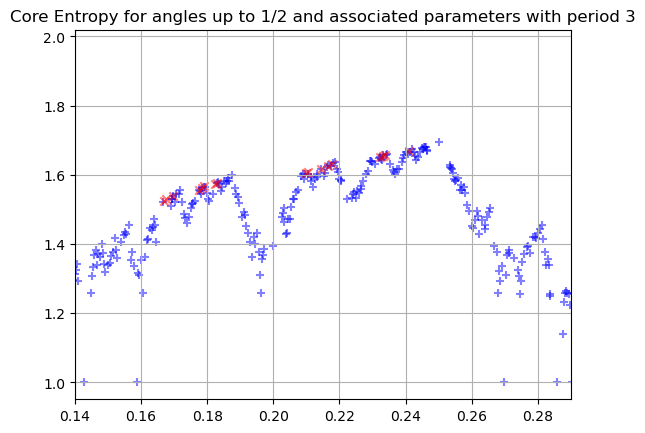

In [12]:
plt.scatter(X,Y,color="blue",alpha=0.5,marker='+')
plt.scatter(X_angles,working_core_entropy,color='red',alpha=0.5, marker='x')
plt.grid(True)
plt.title('Core Entropy for angles up to 1/2 and associated parameters with period 3')

plt.xlim(0.14,0.29)
# plt.ylim(1.6, 1.7)
plt.show()

In [3]:

per3_angles = [
    Angle(3,14),
    Angle(5,28),
    Angle(13,56),
    Angle(19,112),
    Angle(27,112),
    Angle(41,224),
    Angle(47,224),
    Angle(75,448),
    Angle(97,448),
    Angle(159,896),
    Angle(195,896),
    Angle(209,896),
    Angle(299,1792),
    Angle(321,1792),
    Angle(327,1792),
    Angle(377,1792),
    Angle(419,1792)
]
for a in per3_angles:
    print(a.attr_itin_from_ks())

+-+++---
+-++---++
+-++++---+
+-++--+++--
+-+++++---+
+-++----+++-
+-+++--+++--
+-++--++---++
+-+++----+++-
+-++---++---++
+-+++-----+++-
+-++++----+++-
+-++--++--+++--
+-++---++++---+
+-++----++---++
+-+++--++++---+
+-++++-----+++-


Let us check some preperiodic angles in the interval $[\frac{41}{224},\frac{47}{224}]$ 

let say $$\frac{410+i}{2240}, ~\text{ for }0\le i\le60$$

In [ ]:
working = []

theta = Angle(412,2240)
theta.assoc_lambda()
lam = complex(theta.lam) # need to cast from <class 'sympy.core.add.Add'>
lam = lam if lam.imag>0 else lam.conjugate() # always want positive imaginary part

# print(f"{theta}\nitin = {theta.itin}")
seq = get_coefficients(theta.itin)
# print(f"{seq = }")
# print(f"lambda = {lam}")
if not np.abs(lam)<1e-13 and lam.imag>0:
    res = solomyak_alg(lam,len(seq))
#     print(f"{res = }\n")
    if res:
        onBdd = compare(seq[1:],res)
#         print(f"\t\t\t\t{onBdd}\n\n")
        if onBdd: working.append(theta)
#     else:
#         print("\t\t\t\tempty\n\n")
# else:
#     print("\n\t\t\t\ttry another\n\n")

Find the associated parameter $\lambda\in\mathcal{M}_0$ for each preperiodic angle in the $\dfrac{1}{3}$-wake of the form $$\frac{2k+1}{2^q(2^3-1)}\quad 1\le q\le 10; ~ 0\le k\le \left\lceil\frac{(2^3-1)(2^{10}-1)}{2}\right\rceil$$
Order them and plot them.

In [33]:
angle_list = preperiodic_angles(3,11,b_num=1,b_den=7)
working_tuple=[[3,14],[5,28],[13,56],[19,112],[27,112],[41,224],[47,224],[75,448],[97,448],[159,896],[195,896],[209,896],[299,1792],[321,1792],[327,1792],[419,1792]]
angles_lam = []
per3_angles = []
for ang in sorted(angle_list, key=lambda i: i[0]/i[1]):
    theta = Angle(ang[0],ang[1])
    theta.assoc_lambda()
    lam = complex(theta.lam) # need to cast from <class 'sympy.core.add.Add'>
    lam = lam if lam.imag>0 else lam.conjugate()
    if ang in working_tuple:
        per3_angles.append(lam)
        continue
    if not np.abs(lam)<1e-13 and lam.imag>0:
        angles_lam.append(lam)

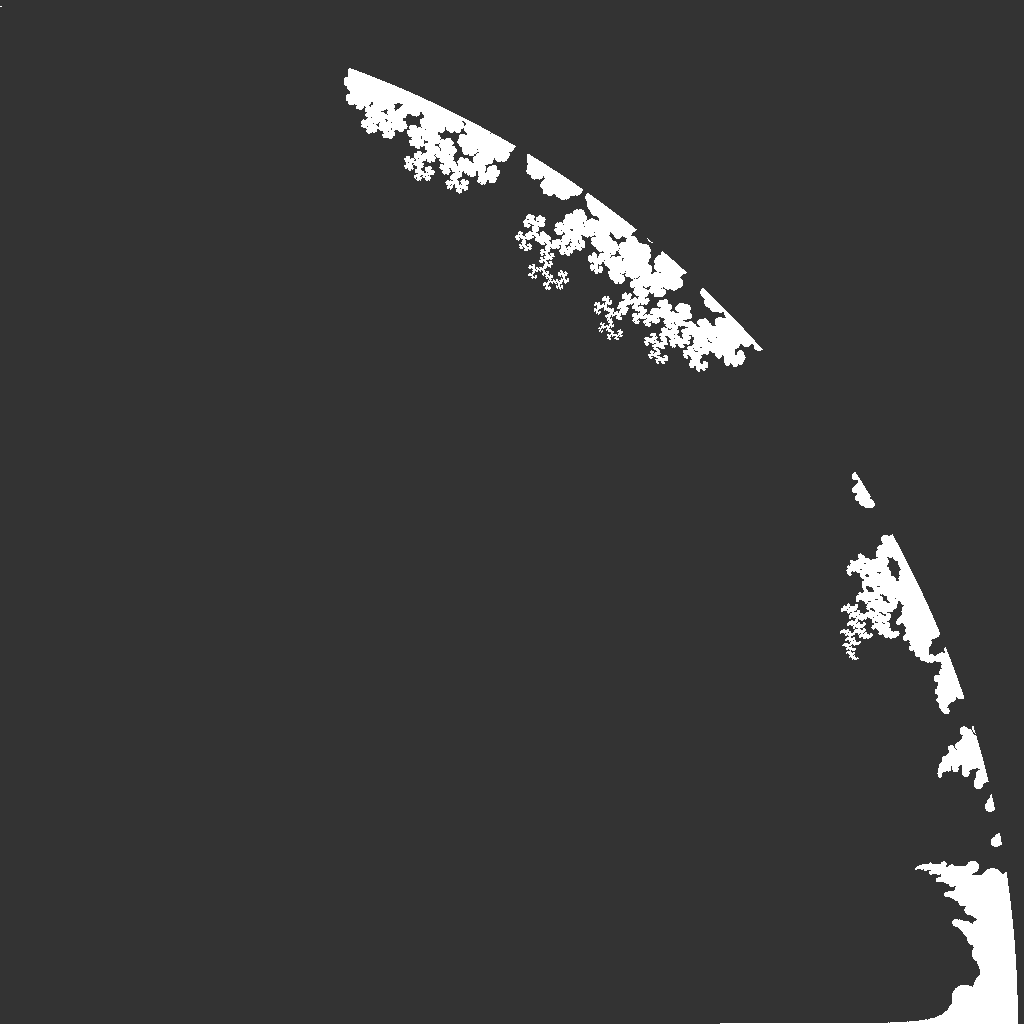

In [34]:
from src.parameter_spaces import checkPolyPM,checkPolyPZM
from PIL import Image
WIDTH = 1024
buf=70

xmin=0.0
xmax=0.711
ymin=0.0
ymax=0.711

max_deg = 16

image = Image.new("RGB", (WIDTH, WIDTH))

pixels = image.load()

for x in range(image.size[0]):   
    for y in range(image.size[1]): 
        px=((xmax-xmin)/(WIDTH-1))*x+xmin  # Convert pixel x-coordinate 
        py=((ymin-ymax)/(WIDTH-1))*y+ymax  # Convert pixel y-coordinate 
        w=complex(px,py)
        if (abs(w) > 2**(-0.5)) or (abs(w) < 0.5):
            pixels[x,y] =  (51,51,51) # (255,255,255) # (77,18,250) #
        else :
            outputPM = checkPolyPM(w,1,0,max_deg)
            if ( outputPM == max_deg ):
                pixels[x, y] = (255,255,255) #(102,0,153)
            else :
                pixels[x,y] = (51,51,51) #(77,int((255-buf)/max_deg*output)+buf,250) # (255,255,255) #
# display the output
image.show() #opens a new window

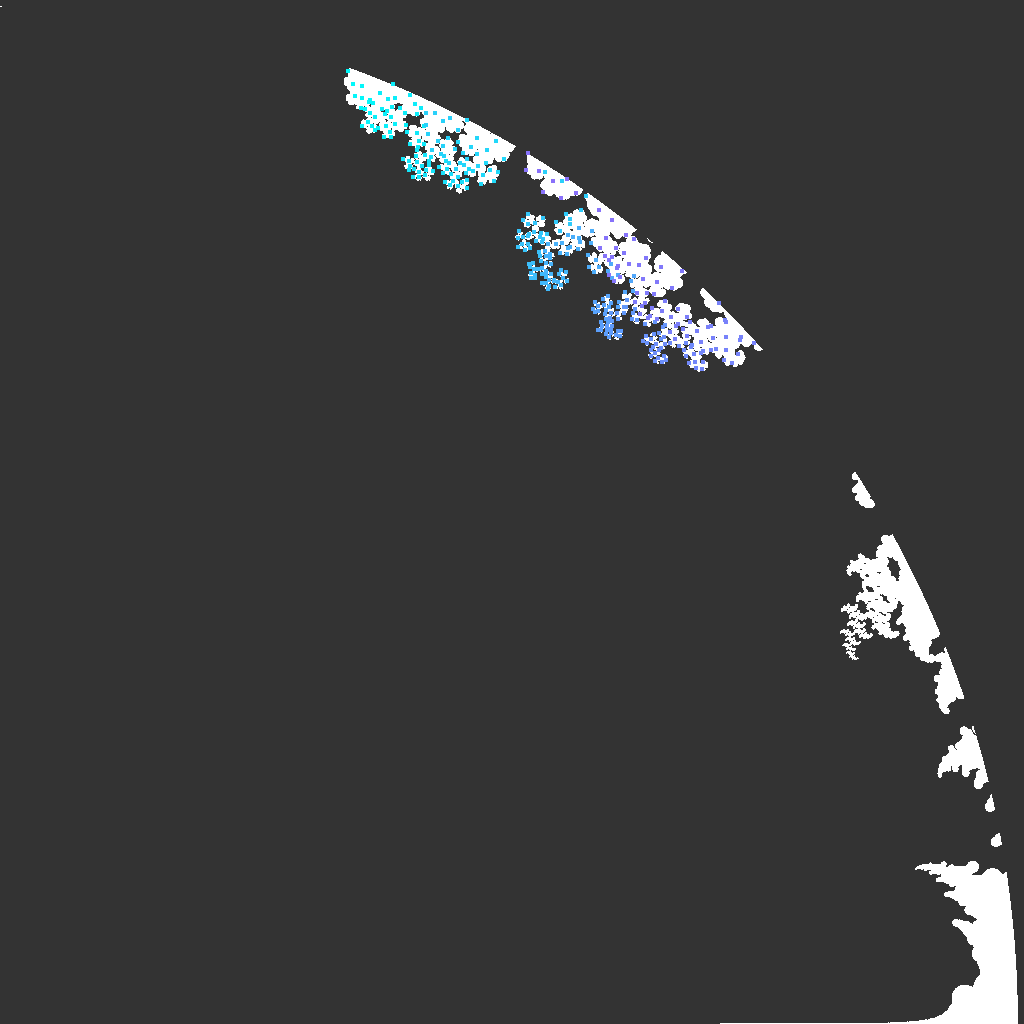

In [35]:
for i,l in enumerate(angles_lam):
    px=l.real
    py=l.imag
    x=int((px-xmin)*(WIDTH-1)/(xmax-xmin))
    y=int((py-ymax)*(WIDTH-1)/(ymin-ymax))
    clr = (int(250/1023*(i-1023)+250),int(250/1023*(1023-i)),250)
    for m,n in product(range(-2,2), repeat=2):
        pixels[x+m,y+n] = clr 
# display the output
image.show() #opens a new window

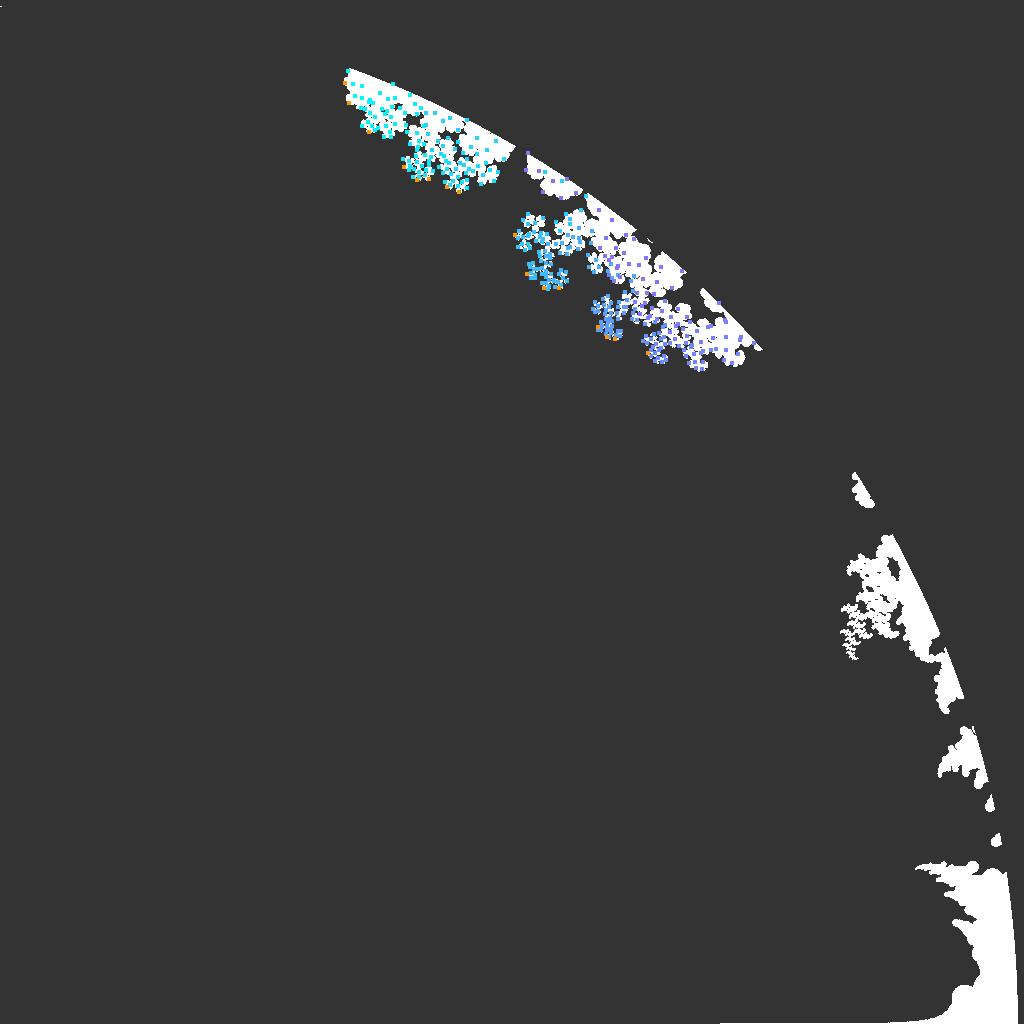

In [39]:
for a in per3_angles:
    px=a.real
    py=a.imag
    x=int((px-xmin)*(WIDTH-1)/(xmax-xmin))
    y=int((py-ymax)*(WIDTH-1)/(ymin-ymax))
    clr = (250,150,0)
    for m,n in product(range(-2,2), repeat=2):
        pixels[x+m,y+n] = clr   
# display the output
image.show() #opens a new window

Find the assiocated $\lambda\in\mathcal{M}_0$ for angles in a Farey sequence and plot them.

In [10]:
angle_list = farey_sequence(45)
working_tuple=[[3,14],[5,28],[13,56],[19,112],[27,112],[41,224],[47,224],[75,448],[97,448],[159,896],[195,896],[209,896],[299,1792],[321,1792],[327,1792],[419,1792]]
angles_lam = []
per3_angles = []
for ang in angle_list:
    theta = Angle(ang[0],ang[1])
    theta.assoc_lambda()
    try:
        lam = complex(theta.lam) # need to cast from <class 'sympy.core.add.Add'>
        lam = lam if lam.imag>0 else lam.conjugate()
    except:
        continue
    else: 
        if ang in working_tuple:
            per3_angles.append(lam)
            print(f"{theta} ~ {lam} [period 3]")
            continue
        if not np.abs(lam)<1e-13 and lam.imag>0:
            angles_lam.append({"angle":(theta.num,theta.den),"itin":theta.itin, "lam": lam})
            print(f"{theta} ~ {lam}")

1/12 ~ 0.7071067811865476j
1/6 ~ (0.25+0.6614378277661477j)
7/40 ~ (0.2929300458296939+0.6195635679880597j)
5/28 ~ (0.2901245624146316+0.5856062443322586j) [period 3]
7/38 ~ (0.3206073773650149+0.5935930886149733j)
3/16 ~ (0.32793280904857125+0.6081868275582862j)
9/44 ~ (0.4127618562181488+0.5709534215938381j)
7/34 ~ (0.3968109501165706+0.5594267161516853j)
3/14 ~ (0.3668759642641294+0.5202594388652009j) [period 3]
7/32 ~ (0.3891385607290765+0.5200285923047661j)
9/40 ~ (0.42330058129230647+0.5292100577947345j)
5/22 ~ (0.43920594593926066+0.5131965166892797j)
9/38 ~ (0.44520340375108647+0.49561432764677327j)
1/4 ~ (0.5+0.5j)
9/34 ~ (0.3709559144195937+0.5971670529811152j)
3/8 ~ (0.5957439419765593+0.254425889416369j)
13/34 ~ (0.6309002985359942+0.2675352568444426j)
13/32 ~ (0.6536104548906485+0.1714314254650431j)
7/16 ~ (0.6360098247570345+0.10692431112128836j)
15/34 ~ (0.6925443721121137+0.051558815991284965j)


In [11]:
from src.parameter_spaces import checkPolyPM,checkPolyPZM
from PIL import Image
WIDTH = 1024
buf=70

xmin=0.0
xmax=0.711
ymin=0.0
ymax=0.711

max_deg = 16

image = Image.new("RGB", (WIDTH, WIDTH))

pixels = image.load()

for x in range(image.size[0]):   
    for y in range(image.size[1]): 
        px=((xmax-xmin)/(WIDTH-1))*x+xmin  # Convert pixel x-coordinate 
        py=((ymin-ymax)/(WIDTH-1))*y+ymax  # Convert pixel y-coordinate 
        w=complex(px,py)
        if (abs(w) > 2**(-0.5)) or (abs(w) < 0.5):
            pixels[x,y] =  (51,51,51) # (255,255,255) # (77,18,250) #
        else :
            outputPM = checkPolyPM(w,1,0,max_deg)
            if ( outputPM == max_deg ):
                pixels[x, y] = (255,255,255) #(102,0,153)
            else :
                pixels[x,y] = (51,51,51) #(77,int((255-buf)/max_deg*output)+buf,250) # (255,255,255) #
# display the output
# image.show() #opens a new window

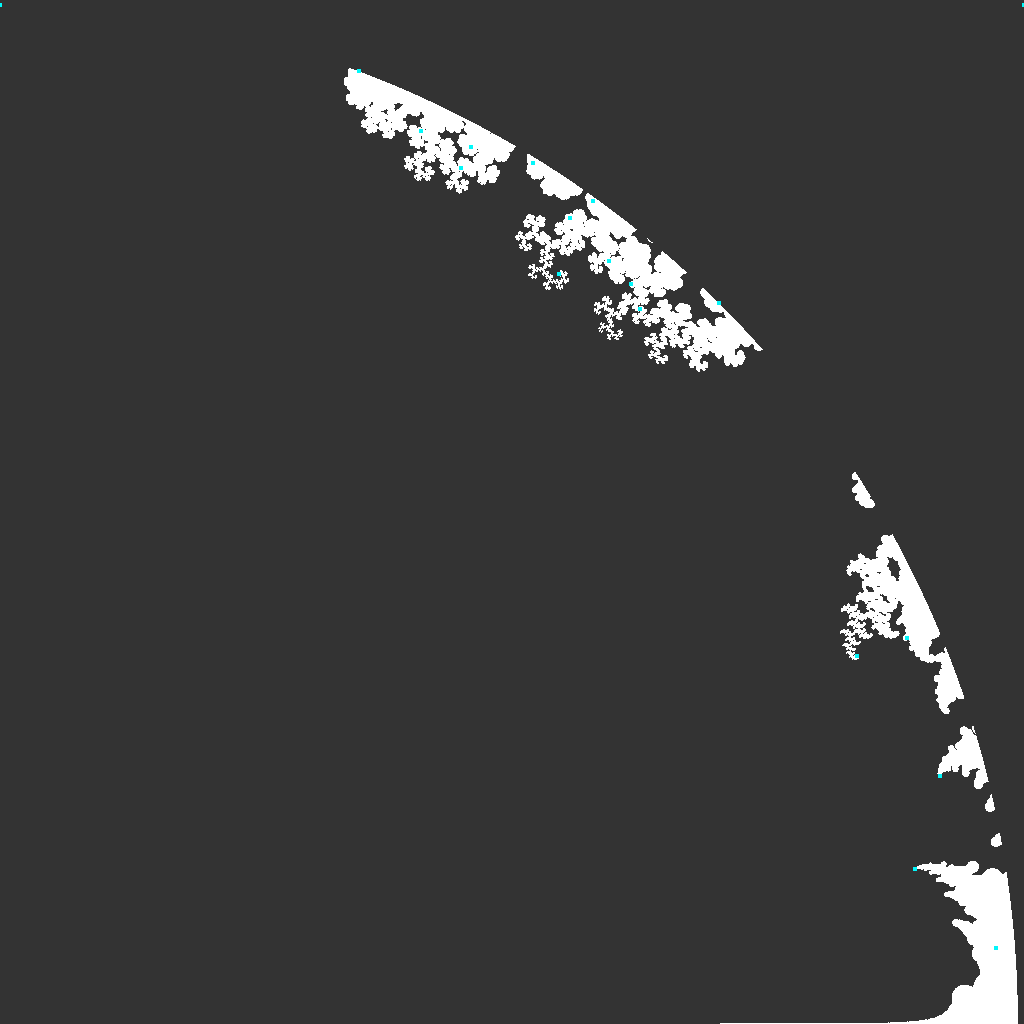

In [12]:
for i,l in enumerate(angles_lam):
    px=l["lam"].real
    py=l["lam"].imag
    x=int((px-xmin)*(WIDTH-1)/(xmax-xmin))
    y=int((py-ymax)*(WIDTH-1)/(ymin-ymax))
    clr = (int(250/1023*(i-1023)+250),int(250/1023*(1023-i)),250)
    for m,n in product(range(-2,2), repeat=2):
        pixels[x+m,y+n] = clr 
# display the output
image.show() #opens a new window

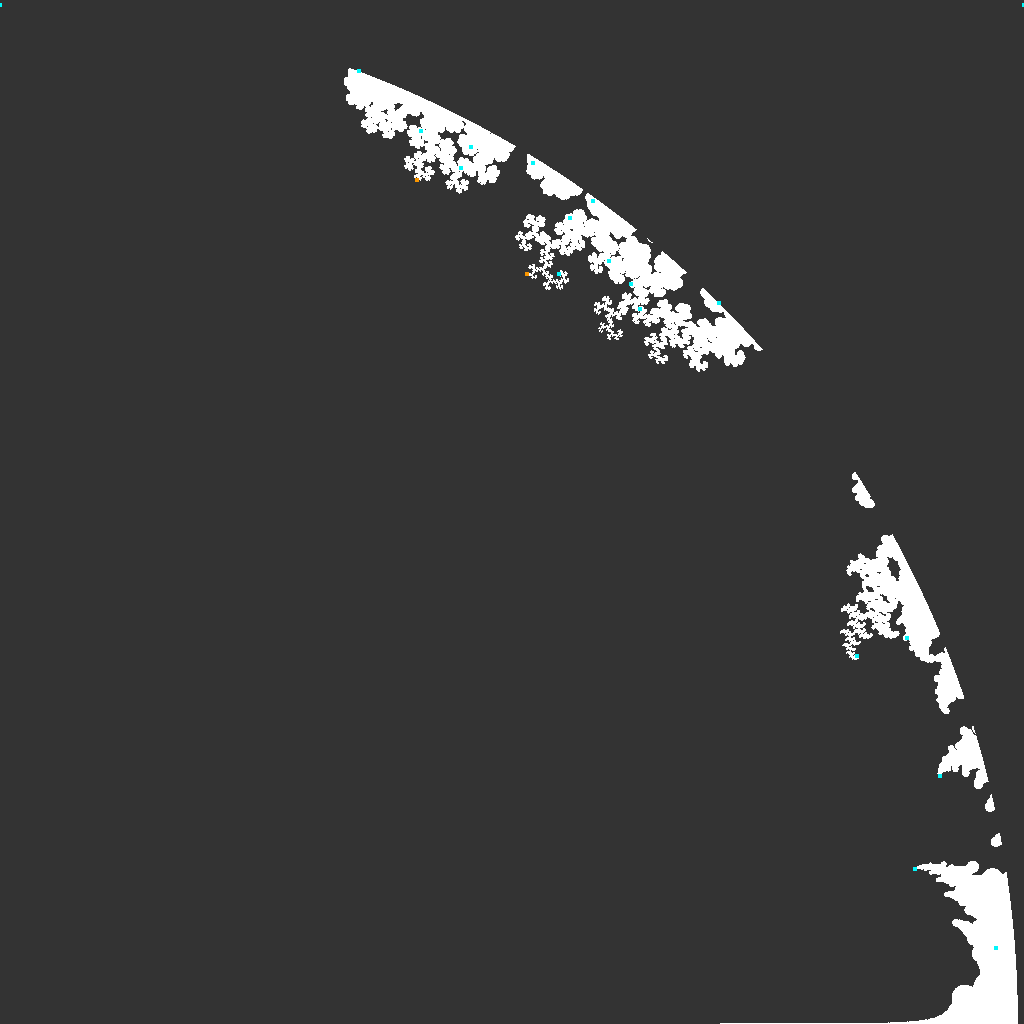

In [13]:
for a in per3_angles:
    px=a.real
    py=a.imag
    x=int((px-xmin)*(WIDTH-1)/(xmax-xmin))
    y=int((py-ymax)*(WIDTH-1)/(ymin-ymax))
    clr = (250,150,0)
    for m,n in product(range(-2,2), repeat=2):
        pixels[x+m,y+n] = clr   
# display the output
image.show() #opens a new window

In [ ]:
working = []
for a in angles_lam:
    print(f"{a['angle'][0]}/{a['angle'][1]} : {a['lam']}")
    seq = get_coefficients(a["itin"])
    print(f"{seq = }")
    res = solomyak_alg(a["lam"],len(seq))
    print(f"{res = }\n")
    if res:
        onBdd = compare(seq[1:],res)
        print(f"\t\t\t\t{onBdd}\n\n")
        if onBdd: 
            working.append(a)

1/12 : 0.7071067811865476j
seq = array([ 1, -1,  1, -1, -1,  1,  1])
res = [array([ 0,  1,  0, -1,  1,  1,  1]), array([ 0,  1,  0, -1,  0,  1,  1]), array([ 1,  1,  1, -1, -1,  1,  1]), array([ 0,  1, -1, -1, -1,  1,  1]), array([ 0,  1,  0, -1,  0,  1,  0]), array([ 0,  1,  1, -1,  1,  1, -1]), array([-1,  1, -1, -1,  1,  1, -1]), array([ 0,  1,  0, -1,  0,  1, -1]), array([ 0,  1,  0, -1, -1,  1, -1])]

				False


1/6 : (0.25+0.6614378277661477j)
seq = array([ 1, -1,  1,  1, -1, -1])
res = [array([-1,  1,  1, -1,  0,  1]), array([ 0,  1,  1,  1, -1,  1]), array([-1,  1,  1, -1, -1,  1]), array([-1,  1,  0, -1, -1,  1]), array([-1,  1,  1, -1,  0,  0]), array([ 0,  1,  1,  1, -1,  0]), array([ 0,  1,  1,  0, -1,  0]), array([-1,  1,  1, -1, -1,  0]), array([-1,  1,  0, -1, -1,  0]), array([ 0,  1,  1,  0,  0, -1]), array([ 0,  1,  1,  1, -1, -1]), array([ 0,  1,  1,  0, -1, -1]), array([-1,  1,  0, -1, -1, -1])]

				False


7/40 : (0.2929300458296939+0.6195635679880597j)
seq = arra

In [ ]:
for a in working:
    px=a["lam"].real
    py=a["lam"].imag
    x=int((px-xmin)*(WIDTH-1)/(xmax-xmin))
    y=int((py-ymax)*(WIDTH-1)/(ymin-ymax))
    clr = (250,50,210)
    for m,n in product(range(-2,2), repeat=2):
        pixels[x+m,y+n] = clr   
# display the output
image.show() #opens a new window

Find the associated parameter $\lambda\in\mathcal{M}_0$ for each preperiodic angle in the $\dfrac{1}{2}$-wake of the form $$\frac{2k+1}{2^q(2^3-1)}\quad 1\le q\le 7; ~ 0\le k\le \left\lceil\frac{(2^3-1)(2^{7}-1)}{2}\right\rceil$$
Order them and plot them.

In [3]:
angle_list = preperiodic_angles(3,8,b_num=1,b_den=3)
angles_lam = []
for ang in sorted(angle_list, key=lambda i: i[0]/i[1]):
    theta = Angle(ang[0],ang[1])
    theta.assoc_lambda()
    lam = complex(theta.lam) # need to cast from <class 'sympy.core.add.Add'>
    lam = lam if lam.imag>0 else lam.conjugate()
    if not np.abs(lam)<1e-13 and lam.imag>0:
        angles_lam.append({"angle":(theta.num,theta.den),"itin":theta.itin, "lam": lam})
        print(f"{theta} ~ {lam}")

161/448 ~ (0.6048495339782973+0.3628984191208651j)
327/896 ~ (0.6314256691979846+0.3024928939344233j)
41/112 ~ (0.6111378507696023+0.31655277394771686j)
329/896 ~ (0.5910670190583545+0.31243276804468917j)
165/448 ~ (0.604625611842004+0.3063473400835849j)
331/896 ~ (0.6026565635938328+0.2946380997152149j)
83/224 ~ (0.5941837977938423+0.28790505423873247j)
333/896 ~ (0.5922027652681233+0.2834959373221852j)
167/448 ~ (0.5889682398958423+0.27269045896589805j)
335/896 ~ (0.5882215994330597+0.26373562937021716j)
21/56 ~ (0.5957439419765593+0.254425889416369j)
337/896 ~ (0.5935943463897072+0.2655036162712637j)
169/448 ~ (0.5990119970250991+0.2728025117101585j)
339/896 ~ (0.6087080005982727+0.2772546985424832j)
85/224 ~ (0.613090986178432+0.2817025702950637j)
341/896 ~ (0.6181678195691331+0.298472723974487j)
171/448 ~ (0.6318102841591512+0.2820831590695868j)
343/896 ~ (0.6478691221223366+0.2553992017049231j)
43/112 ~ (0.6463426731671975+0.2848598702496899j)
175/448 ~ (0.6591077193230498+0.2173

In [4]:
from src.parameter_spaces import checkPolyPM,checkPolyPZM
from PIL import Image
WIDTH = 1024
buf=70

xmin=0.0
xmax=0.711
ymin=0.0
ymax=0.711

max_deg = 16

image = Image.new("RGB", (WIDTH, WIDTH))

pixels = image.load()

for x in range(image.size[0]):   
    for y in range(image.size[1]): 
        px=((xmax-xmin)/(WIDTH-1))*x+xmin  # Convert pixel x-coordinate 
        py=((ymin-ymax)/(WIDTH-1))*y+ymax  # Convert pixel y-coordinate 
        w=complex(px,py)
        if (abs(w) > 2**(-0.5)) or (abs(w) < 0.5):
            pixels[x,y] =  (51,51,51) # (255,255,255) # (77,18,250) #
        else :
            outputPM = checkPolyPM(w,1,0,max_deg)
            if ( outputPM == max_deg ):
                pixels[x, y] = (255,255,255) #(102,0,153)
            else :
                pixels[x,y] = (51,51,51) #(77,int((255-buf)/max_deg*output)+buf,250) # (255,255,255) #
# display the output
# image.show() #opens a new window

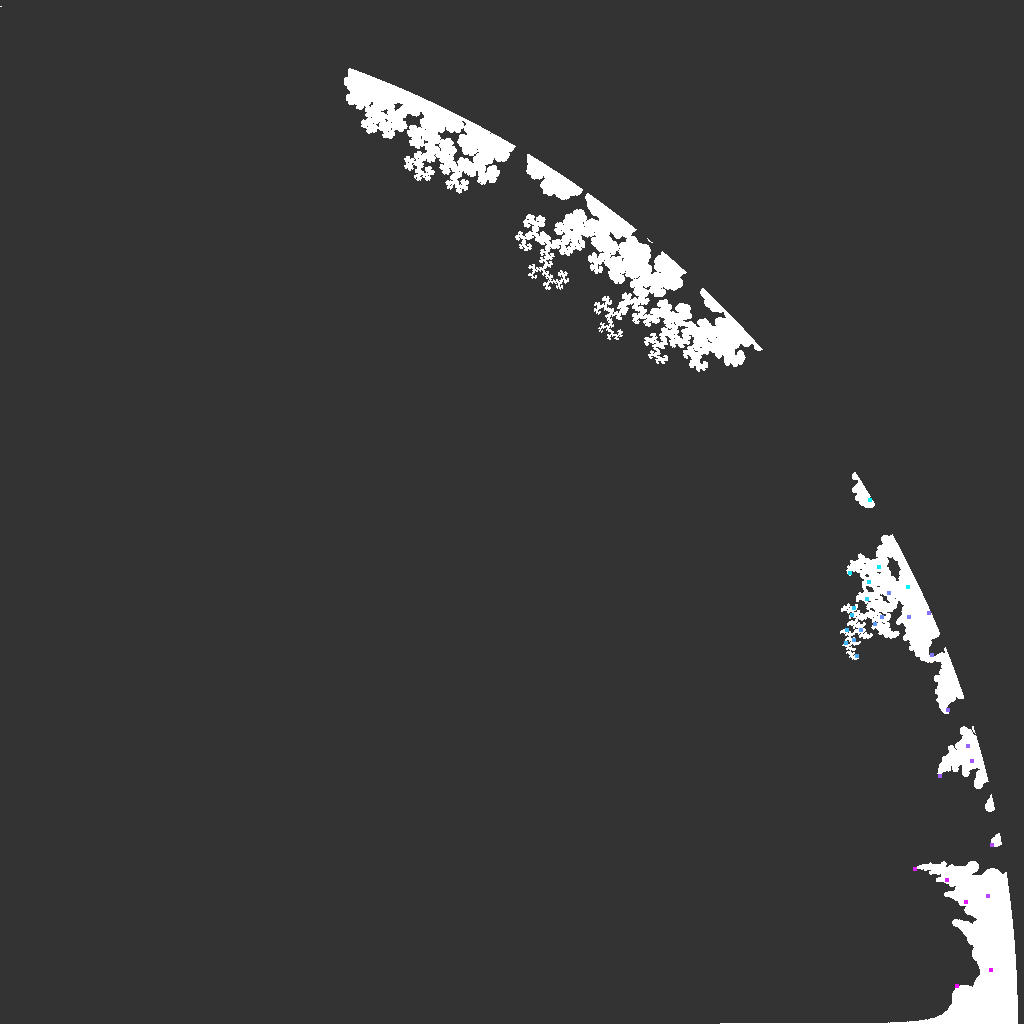

In [5]:
num = len(angles_lam)
for i,l in enumerate(angles_lam):
    px=l["lam"].real
    py=l["lam"].imag
    x=int((px-xmin)*(WIDTH-1)/(xmax-xmin))
    y=int((py-ymax)*(WIDTH-1)/(ymin-ymax))
    clr = (int(250/num*(i-num)+250),int(250/num*(num-i)),250)
    for m,n in product(range(-2,2), repeat=2):
        pixels[x+m,y+n] = clr 
# display the output
image.show() #opens a new window

In [6]:
working = []
for a in angles_lam:
    print(f"{a['angle'][0]}/{a['angle'][1]} : {a['lam']}")
    seq = get_coefficients(a["itin"])
    print(f"{seq = }")
    res = solomyak_alg(a["lam"],len(seq))
    print(f"{res = }\n")
    if res:
        onBdd = compare(seq[1:],res)
        print(f"\t\t\t\t{onBdd}\n\n")
        if onBdd: 
            working.append(a)

161/448 : (0.6048495339782973+0.3628984191208651j)
seq = array([ 1, -1, -1,  1,  1,  1, -1])
res = [array([-1,  0,  0,  1,  1,  1,  1]), array([-1,  1, -1,  1,  1,  1,  1]), array([-1,  0,  1,  0,  1,  1,  1]), array([-1,  0,  1,  1,  0,  1,  1]), array([-1,  0,  1,  0,  0,  1,  1]), array([-1,  0,  0,  1,  1,  0,  1]), array([-1,  0,  1,  0,  1,  0,  1]), array([-1,  0,  0,  1,  1, -1,  1]), array([-1,  0,  0,  1,  1,  1,  0]), array([-1,  0,  1,  0,  1,  1,  0]), array([-1,  0,  0,  1,  1,  0,  0]), array([-1, -1,  1,  1,  1, -1,  0]), array([-1,  0,  0,  1,  1,  1, -1]), array([-1,  0,  1,  0,  1,  1, -1]), array([-1, -1,  1,  1,  1,  0, -1]), array([-1,  0,  0,  1,  1,  0, -1]), array([-1, -1,  1,  1,  0,  0, -1]), array([-1, -1,  1,  1,  1, -1, -1])]



/home/ssilvestri/anaconda3/envs/mandel_thurston/lib/python3.8/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 's_list' of function 'compare'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../src/utils.py", line 401:
@njit
def compare(sequence:list, s_list:list)->bool:
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


				False


327/896 : (0.6314256691979846+0.3024928939344233j)
seq = array([ 1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1])
res = [array([-1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1]), array([-1, -1,  1,  1,  1,  0,  1, -1, -1,  1,  1,  1,  1,  1]), array([-1, -1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  1]), array([-1, -1,  1,  1,  1,  0,  0,  0,  1, -1,  0,  1,  1,  1]), array([-1, -1,  1,  1,  0,  1,  1, -1, -1, -1,  0,  1,  1,  1]), array([-1, -1,  1,  1,  1,  0,  0,  0,  0,  1, -1,  1,  1,  1]), array([-1, -1,  1,  1,  0,  1,  1, -1, -1,  0, -1,  1,  1,  1]), array([-1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1]), array([-1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  0,  1,  1]), array([-1, -1,  1,  1,  1,  0,  0,  0,  0,  0,  1,  0,  1,  1]), array([-1, -1,  1,  1,  0,  1,  1, -1, -1, -1,  1,  0,  1,  1]), array([-1, -1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1]), array([-1, -1,  1,  1,  0,  1,  1, -1, -1,  0,  0,  0,  1,  1]), array([-1, -1, 

res = [array([-1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  1]), array([-1,  0,  0,  1,  1,  1,  1,  1, -1,  1,  1]), array([-1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1]), array([-1,  0,  0,  1,  1,  1,  1,  1,  0,  0,  1]), array([-1,  0,  0,  1,  1,  1,  1,  0,  0,  0,  1]), array([-1, -1,  1,  1,  1,  1, -1, -1,  0,  0,  1]), array([-1,  0,  0,  1,  1,  1,  1,  1, -1,  0,  1]), array([-1, -1,  1,  1,  1,  1, -1,  0, -1,  0,  1]), array([-1, -1,  1,  1,  1,  1, -1, -1, -1,  0,  1]), array([-1,  0,  0,  1,  1,  1,  1,  0,  1, -1,  1]), array([-1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1]), array([-1,  0,  0,  1,  1,  1,  1,  1,  0, -1,  1]), array([-1, -1,  1,  1,  1,  0,  0, -1,  0, -1,  1]), array([-1, -1,  1,  1,  1,  1, -1, -1,  0, -1,  1]), array([-1,  0,  0,  1,  1,  1,  1,  1, -1, -1,  1]), array([-1, -1,  1,  1,  1,  0,  0,  0, -1, -1,  1]), array([-1, -1,  1,  1,  1,  0,  0, -1, -1, -1,  1]), array([-1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  0]), array([-1, -1,  1,  1,  1,  1, -1, -1, 

res = [array([-1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1]), array([-1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  0,  0,  1]), array([-1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  0,  1]), array([-1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  0, -1,  1]), array([-1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  0,  1,  0]), array([-1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  0]), array([-1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  0,  0,  0]), array([-1, -1,  1,  1,  1,  1,  1,  0,  0,  0, -1, -1,  0]), array([-1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  0,  1, -1]), array([-1, -1,  1,  1,  1,  1,  1,  0,  0,  0, -1,  0, -1]), array([-1, -1,  1,  1,  1,  1,  1,  0,  0, -1,  0, -1, -1]), array([-1, -1,  1,  1,  1,  1,  1,  0,  0,  0, -1, -1, -1])]

				False


335/896 : (0.5882215994330597+0.26373562937021716j)
seq = array([ 1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1])
res = [array([-1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1]), array([-1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  0,

res = [array([-1, -1,  1,  1,  1,  1, -1,  0,  1, -1,  1,  1,  1,  1]), array([-1, -1,  1,  1,  1,  0,  1,  0, -1, -1,  1,  1,  1,  1]), array([-1, -1,  1,  1,  1,  1, -1,  0,  0,  1,  0,  1,  1,  1]), array([-1, -1,  1,  1,  1,  0,  1, -1,  0,  0,  0,  1,  1,  1]), array([-1, -1,  1,  1,  1,  1, -1,  0,  0,  1, -1,  1,  1,  1]), array([-1, -1,  1,  1,  1,  0,  1, -1,  0,  0, -1,  1,  1,  1]), array([-1, -1,  1,  1,  1,  0,  0,  1, -1,  0, -1,  1,  1,  1]), array([-1, -1,  1,  1,  1,  1, -1,  0,  1, -1,  1,  0,  1,  1]), array([-1, -1,  1,  1,  1,  0,  1, -1,  0, -1,  1,  0,  1,  1]), array([-1, -1,  1,  1,  1,  1, -1,  0,  0,  1,  0,  0,  1,  1]), array([-1, -1,  1,  1,  1,  0,  1, -1,  0,  0,  0,  0,  1,  1]), array([-1, -1,  1,  1,  1,  0,  0,  1, -1, -1,  0,  0,  1,  1]), array([-1, -1,  1,  1,  1,  0,  0,  1, -1,  0, -1,  0,  1,  1]), array([-1, -1,  1,  1,  1,  0,  0,  0,  1, -1, -1,  0,  1,  1]), array([-1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1]), array([-1, -1,  1,

res = [array([-1, -1,  1,  1,  1,  1, -1,  0,  1,  1,  1,  1,  1]), array([-1, -1,  1,  1,  1,  0,  1, -1,  1,  1,  1,  1,  1]), array([-1, -1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1]), array([-1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  1,  1,  1]), array([-1, -1,  1,  1,  1,  0,  0,  1,  1, -1,  1,  1,  1]), array([-1, -1,  1,  1,  0,  1,  1,  0, -1, -1,  1,  1,  1]), array([-1, -1,  1,  1,  1,  0,  1, -1,  1,  1,  0,  1,  1]), array([-1, -1,  1,  1,  1,  0,  0,  1,  0,  1,  0,  1,  1]), array([-1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,  1,  1]), array([-1, -1,  1,  1,  0,  1,  1,  0, -1,  0,  0,  1,  1]), array([-1, -1,  1,  1,  0,  1,  1,  0, -1, -1,  0,  1,  1]), array([-1, -1,  1,  1,  1,  0,  0,  0,  1,  1, -1,  1,  1]), array([-1, -1,  1,  1,  1,  0,  0,  1,  0,  1, -1,  1,  1]), array([-1, -1,  1,  1,  0,  1,  1,  0, -1,  0, -1,  1,  1]), array([-1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1]), array([-1, -1,  1,  1,  0,  1,  1, -1,  1, -1, -1,  1,  1]), array([-1, -1,  1

res = [array([-1, -1,  1,  0,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1]), array([-1, -1,  0,  1,  1,  1,  0, -1,  0,  1,  1,  1,  1,  1]), array([-1, -1,  0,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1]), array([-1, -1,  0,  1,  1,  1, -1,  1,  0, -1,  1,  1,  1,  1]), array([-1, -1,  0,  1,  1,  0,  1,  0,  0, -1,  1,  1,  1,  1]), array([-1, -1,  0,  1,  1,  0,  1,  1, -1, -1,  1,  1,  1,  1]), array([-1, -1,  1,  0,  0,  1,  0,  1,  1,  1,  0,  1,  1,  1]), array([-1, -1,  0,  1,  1,  1, -1,  1, -1,  1,  0,  1,  1,  1]), array([-1, -1,  0,  1,  1,  1, -1,  1,  0,  0,  0,  1,  1,  1]), array([-1, -1,  0,  1,  1,  0,  1,  0,  0,  0,  0,  1,  1,  1]), array([-1, -1,  0,  1,  1,  0,  1,  1, -1, -1,  0,  1,  1,  1]), array([-1, -1,  0,  1,  1,  1, -1,  0,  1,  1, -1,  1,  1,  1]), array([-1, -1,  0,  1,  1,  1, -1,  1,  0,  1, -1,  1,  1,  1]), array([-1, -1,  0,  1,  1,  0,  1,  0,  0,  0, -1,  1,  1,  1]), array([-1, -1,  0,  1,  1,  0,  1,  1, -1,  0, -1,  1,  1,  1]), array([-1, -1,  0,

res = [array([-1,  0, -1,  0,  1,  1,  1,  1,  1,  1,  1]), array([-1, -1,  1,  0,  0,  0,  1,  1,  1,  1,  1]), array([-1, -1,  1, -1,  1,  1,  0,  1,  1,  1,  1]), array([-1, -1,  0,  1,  1,  0, -1,  1,  1,  1,  1]), array([-1,  0, -1,  0,  1,  1,  1,  0,  1,  1,  1]), array([-1, -1,  1, -1,  1,  1,  1,  0,  1,  1,  1]), array([-1, -1,  0,  1,  1,  0,  0,  0,  1,  1,  1]), array([-1, -1,  0,  1,  1,  1, -1,  0,  1,  1,  1]), array([-1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1]), array([-1, -1,  0,  1,  1,  0,  1, -1,  1,  1,  1]), array([-1, -1,  0,  1,  1,  1, -1, -1,  1,  1,  1]), array([-1,  0, -1,  0,  1,  1,  1,  1,  0,  1,  1]), array([-1, -1,  0,  1,  1, -1,  1,  1,  0,  1,  1]), array([-1, -1,  1, -1,  1,  1,  0,  1,  0,  1,  1]), array([-1, -1,  0,  1,  1,  0,  0,  1,  0,  1,  1]), array([-1, -1,  1, -1,  1,  1,  1,  0,  0,  1,  1]), array([-1, -1,  0,  1,  1,  0,  1,  0,  0,  1,  1]), array([-1, -1,  0,  1,  1,  0,  0,  0,  0,  1,  1]), array([-1, -1,  0,  1,  1,  1, -1,  0, 

res = [array([-1, -1, -1,  1,  1,  1,  0,  1,  1,  1,  1]), array([-1, -1, -1,  1,  1,  1,  1,  0,  1,  1,  1]), array([-1, -1, -1,  1,  1,  1,  1,  0,  0,  1,  1]), array([-1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1]), array([-1, -1, -1,  1,  1,  1,  1,  0,  1,  0,  1]), array([-1, -1, -1,  1,  1,  1,  1,  1,  0,  0,  1]), array([-1, -1, -1,  1,  1,  1,  1,  1, -1,  0,  1]), array([-1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1]), array([-1, -1, -1,  1,  1,  1,  1,  0,  1, -1,  1]), array([-1, -1, -1,  1,  1,  1,  1,  1,  0, -1,  1]), array([-1, -1, -1,  1,  1,  1,  0,  1,  1,  1,  0]), array([-1, -1, -1,  1,  1,  1,  1,  0,  1,  1,  0]), array([-1, -1, -1,  1,  1,  1,  1,  1,  0,  1,  0]), array([-1, -1, -1,  1,  1,  1,  1,  0,  0,  1,  0]), array([-1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  0]), array([-1, -1, -1,  1,  1,  1,  1,  0,  1,  0,  0]), array([-1, -1, -1,  1,  1,  1,  1,  1,  0,  0,  0]), array([-1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  0]), array([-1, -1, -1,  1,  1,  1,  1,  1, 

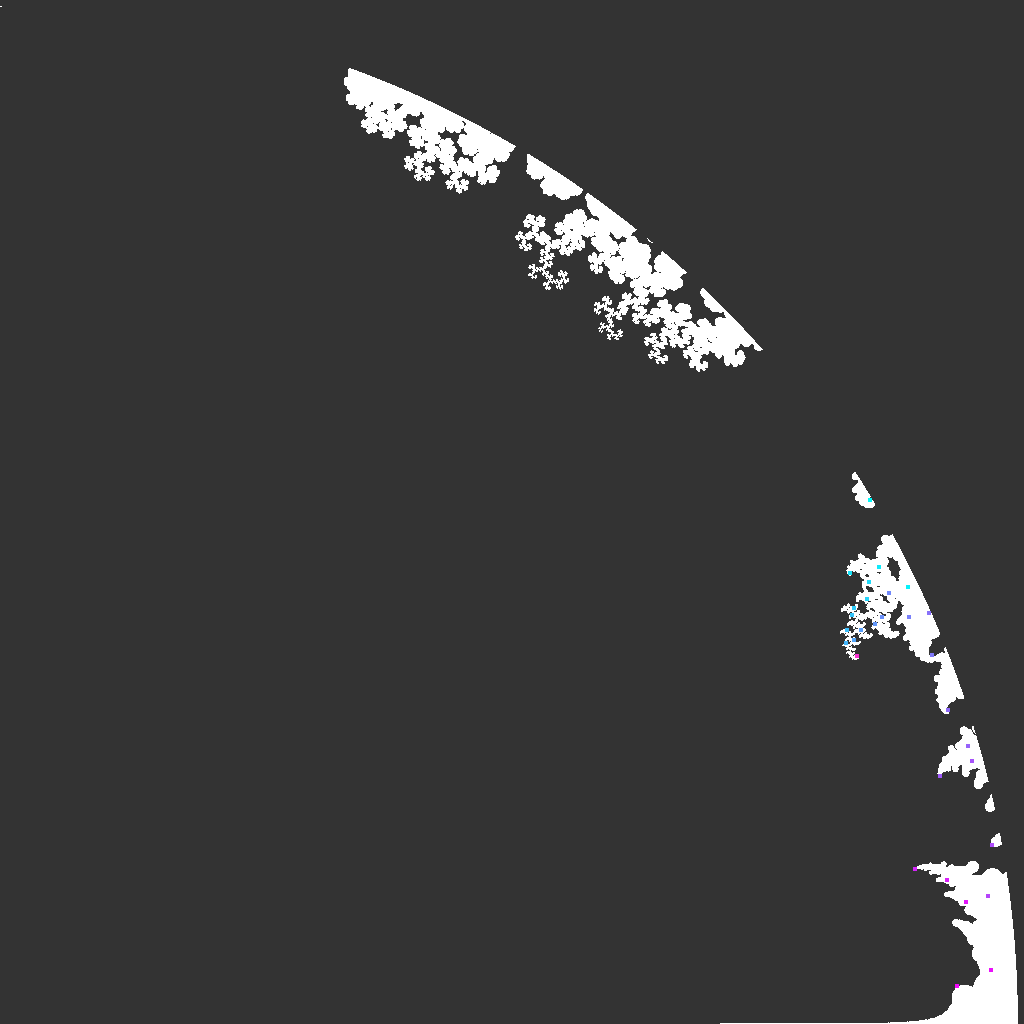

In [7]:
for a in working:
    px=a["lam"].real
    py=a["lam"].imag
    x=int((px-xmin)*(WIDTH-1)/(xmax-xmin))
    y=int((py-ymax)*(WIDTH-1)/(ymin-ymax))
    clr = (250,50,210)
    for m,n in product(range(-2,2), repeat=2):
        pixels[x+m,y+n] = clr   
# display the output
image.show() #opens a new window